### Participant 1

In [80]:
import json

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

data_file = 'UuBoG0_KiytpUZXX9V7Enw.txt'
  
# reading the data from the file
with open(data_file) as f:
    data = f.read()

print("Data type before reconstruction : ", type(data))
      
# reconstructing the data as a dictionary
js = json.loads(data)
  
print("Data type after reconstruction : ", type(js))

Data type before reconstruction :  <class 'str'>
Data type after reconstruction :  <class 'dict'>


In [81]:
def get_text_file_responses(data_file):
    with open(data_file) as f:
        data = json.load(f)

    return data['responses']

Clean code of duplicates

In [82]:
cleanData = {}

for key,value in js.items():
    if key not in cleanData.values():
        cleanData[key] = value



In [83]:
cleanData['responses'].keys()

dict_keys(['vis2/vis334.png', 'vis3/vis617.png', 'vis3/vis914.png', 'science/v483_n7389_20_f3.png', 'news/wsj157.png', 'vis1/visMost656.png', 'news/economist_daily_chart_5.png', 'government/whoP08.png', 'vis3/vis942.png', 'vis1/visMost122.png', 'vis1/visMost22.png', 'science/v489_n7416_2_f2.png', 'news/economist_daily_chart_422.png', 'science/v487_n7408_23_f1.png', 'vis2/vis163.png', 'vis3/vis824.png', 'vis1/visMost738.png', 'news/np_7.png', 'vis2/vis352.png', 'vis1/visMost530.png', 'government/whoQ56_6.png', 'science/v485_n7396_3_f1.png', 'government/whoJ23.png', 'government/whoG06.png', 'news/economist_daily_chart_35.png', 'government/whoC21_1.png', 'science/v483_n7389_14_f2.png', 'vis2/vis383.png', 'vis3/vis573.png', 'vis2/vis356.png'])

In [84]:
df = pd.DataFrame()
for key, value in cleanData['responses'].items():
    new_df = pd.json_normalize(value)
    new_df['image'] = key
    df = pd.concat([df, new_df])

In [85]:
df['image'].str.split('/').apply(lambda x: x[0])

0     vis2
1     vis2
2     vis2
3     vis2
4     vis2
      ... 
6     vis2
7     vis2
8     vis2
9     vis2
10    vis2
Name: image, Length: 369, dtype: object

In [86]:
df['folder'] = df['image'].str.split('/').apply(lambda x: x[0])

In [87]:
def create_table(responses):
    df = pd.DataFrame()
    for key, value in responses.items():
        new_df = pd.json_normalize(value)
        new_df['image'] = key
        df = pd.concat([df, new_df])
    
    df['folder'] = df['image'].str.split('/').apply(lambda x: x[0])
    
    return df.replace(['noe'], ['nor'])\
             .replace(['std', 'dis', 'nor', 'agree', 'Strong_agree'],
                      ['Strongly Disagree', 'Disagree', 'Neither', 'Agree', 'Strongly Agree']
                     )

In [88]:
df = create_table(cleanData['responses'])

In [89]:
df['folder'].value_counts()

news          65
vis3          62
science       62
government    62
vis1          60
vis2          58
Name: folder, dtype: int64

## Visuals: Relationship between Visualization Type and Response Value

### Participant 1

In [90]:
df.loc[df['folder'] == 'news']

,name,id,response,image,folder
0,likert_1,2,Agree,news/wsj157.png,news
1,likert_2,10,Strongly Disagree,news/wsj157.png,news
2,likert_3,12,Agree,news/wsj157.png,news
3,likert_3,11,Strongly Agree,news/wsj157.png,news
4,likert_3,17,Agree,news/wsj157.png,news
...,...,...,...,...,...
7,likert_8,40,Strongly Disagree,news/economist_daily_chart_35.png,news
8,likert_9,41,Strongly Agree,news/economist_daily_chart_35.png,news
9,likert_10,47,Agree,news/economist_daily_chart_35.png,news
10,likert_11,51,Strongly Agree,news/economist_daily_chart_35.png,news


In [91]:
sns.set_style('whitegrid')

In [92]:
df.loc[df['response'] == 'Strongly Disagree'].shape[0] / df.shape[0]

0.12466124661246612

In [93]:
df.shape[0]

369

In [94]:
def plot_response(df, folder_name):
    responses = ['Strongly Disagree', 'Disagree', 'Neither', 'Agree', 'Strongly Agree']

    sns.catplot(data=df.loc[df['folder'] == folder_name],
            x='response',
            kind="count",
            height=5,
            aspect=2,
            order=responses)

    plt.title(f"Responses for {folder_name.capitalize()} Visuals")
    
    count = 0
    for response in responses:
        height = df.loc[(df['response'] == response) &\
                       (df['folder'] == folder_name)
                      ].shape[0]
        total_rows = df.loc[df['folder'] == folder_name].shape[0]
        plt.annotate(f"{int((height/total_rows)*100)}%", (count, height+1))
        count += 1

ZeroDivisionError: division by zero

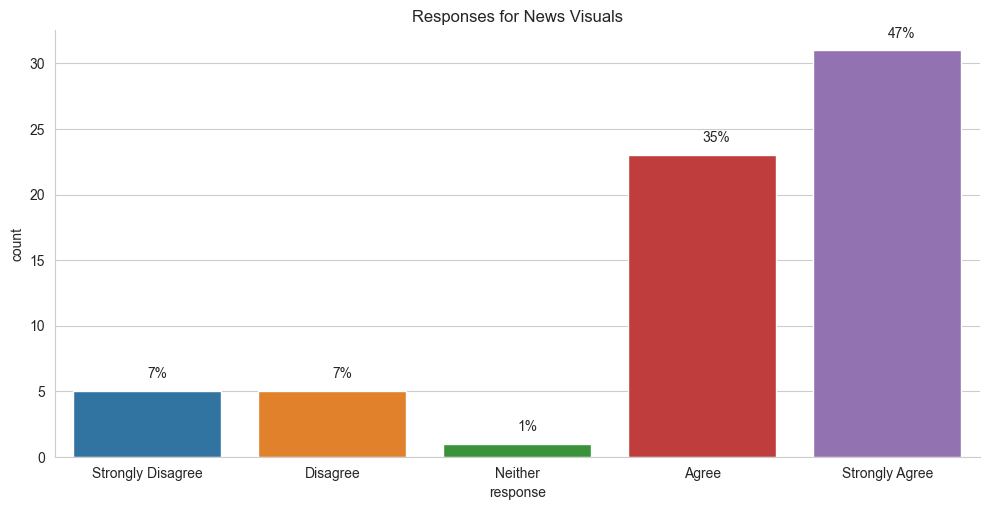

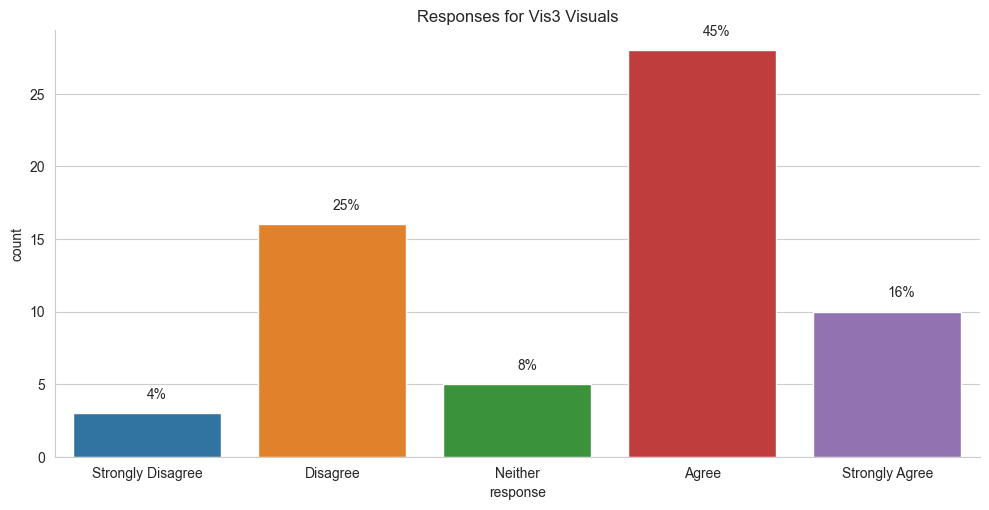

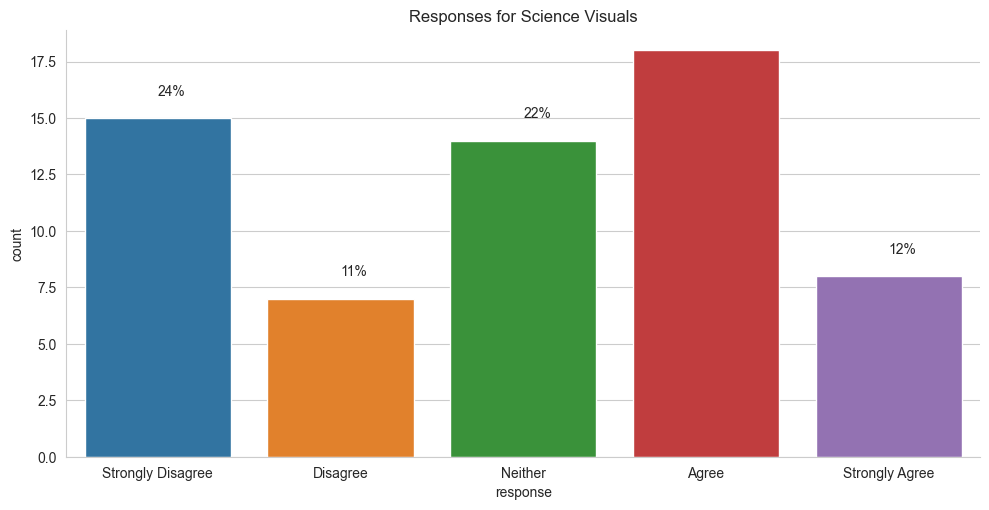

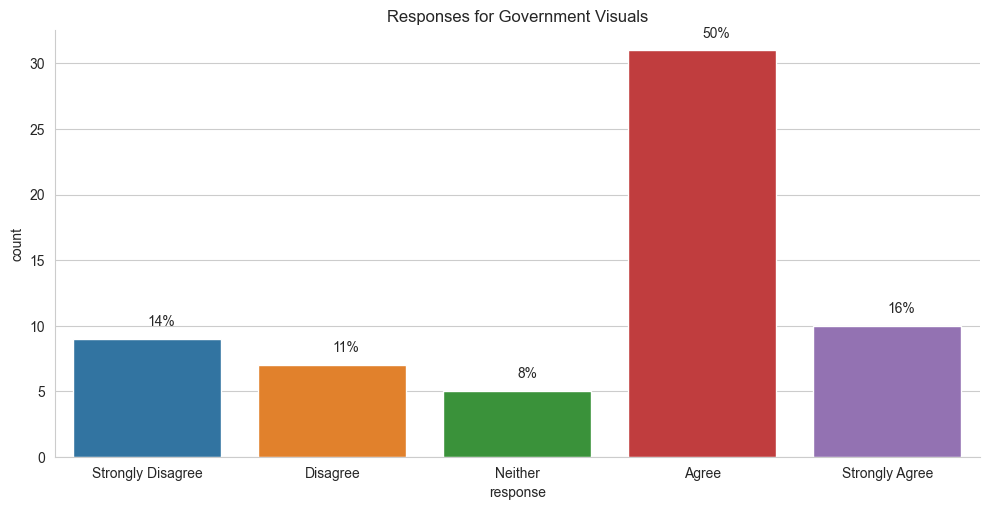

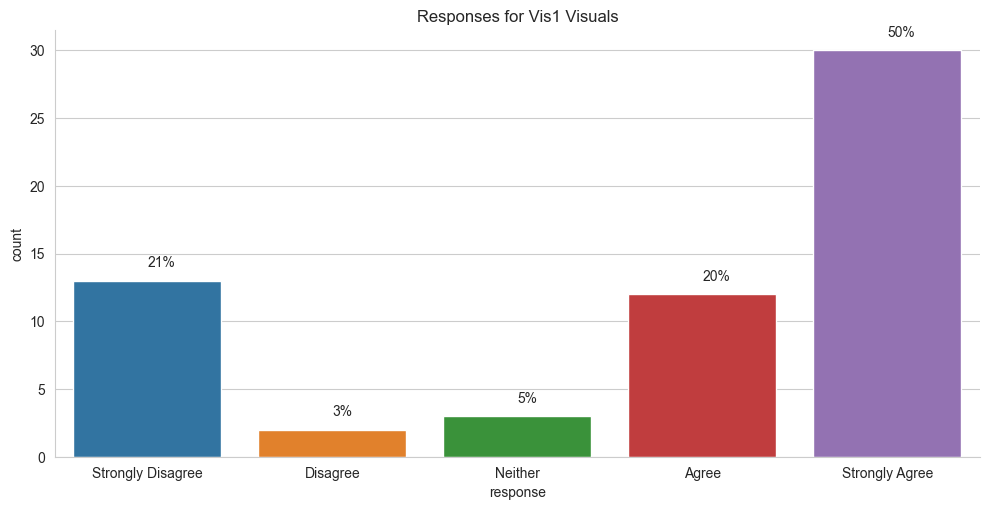

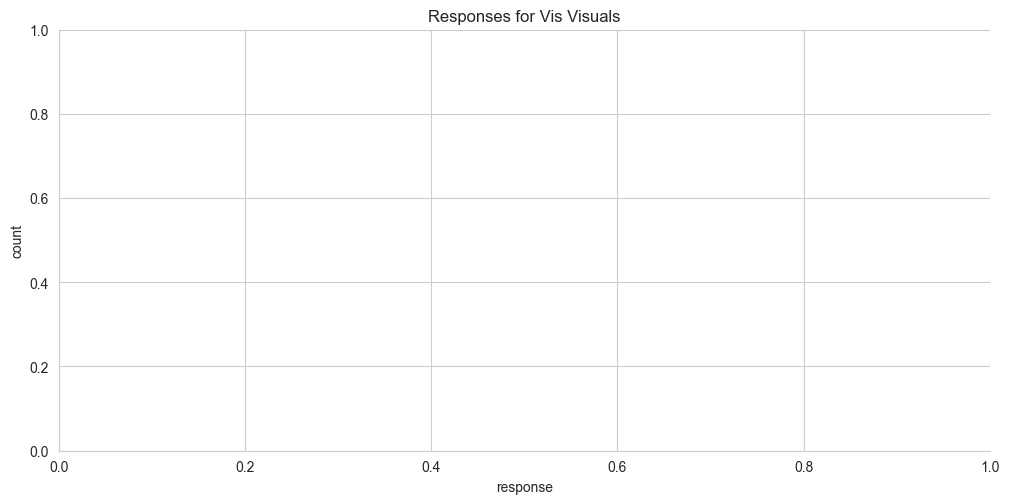

In [95]:
plot_response(df, 'news')
plot_response(df, 'vis3')
plot_response(df, 'science')
plot_response(df, 'government')
plot_response(df, 'vis1')
plot_response(df, 'vis')

## Participant 2

In [ ]:
#Get
data_file = 'mXQxt45qf3HmNZ8V6Y-gQg.txt'
  
# reading the data from the file
with open(data_file) as f:
    data = f.read()
      
# reconstructing the data as a dictionary
js2 = json.loads(data)

cleanData = {}

for key,value in js2.items():
    if key not in cleanData.values():
        cleanData[key] = value
        
df2 = create_table(cleanData['responses'])

sns.set_style('whitegrid')

plot_response(df2, 'news')
plot_response(df2, 'vis3')
plot_response(df2, 'science')
plot_response(df2, 'government')
plot_response(df2, 'vis1')
plot_response(df2, 'vis2')

### Participant 3

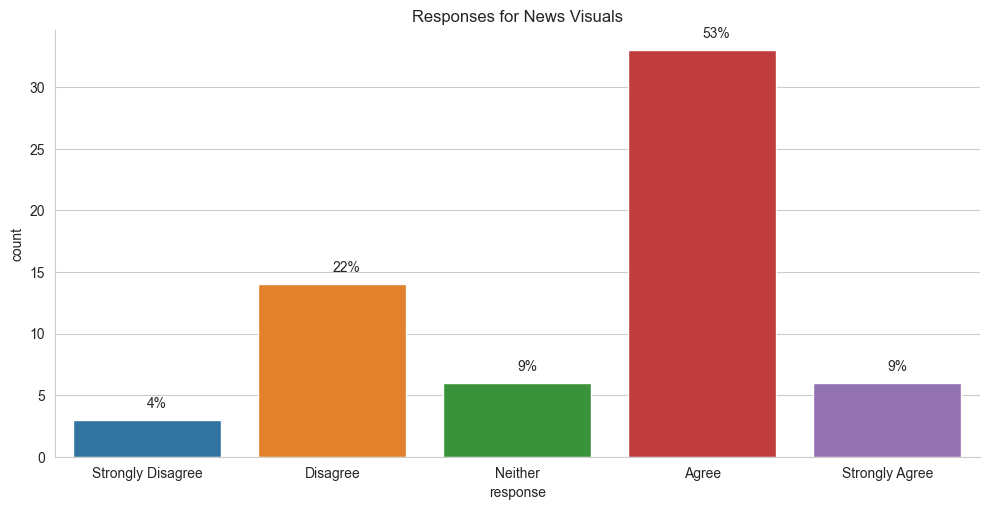

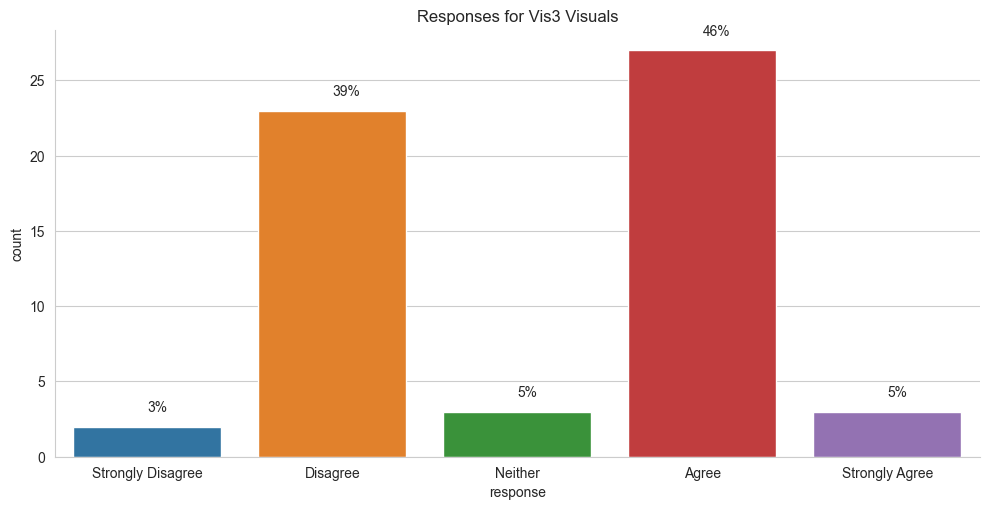

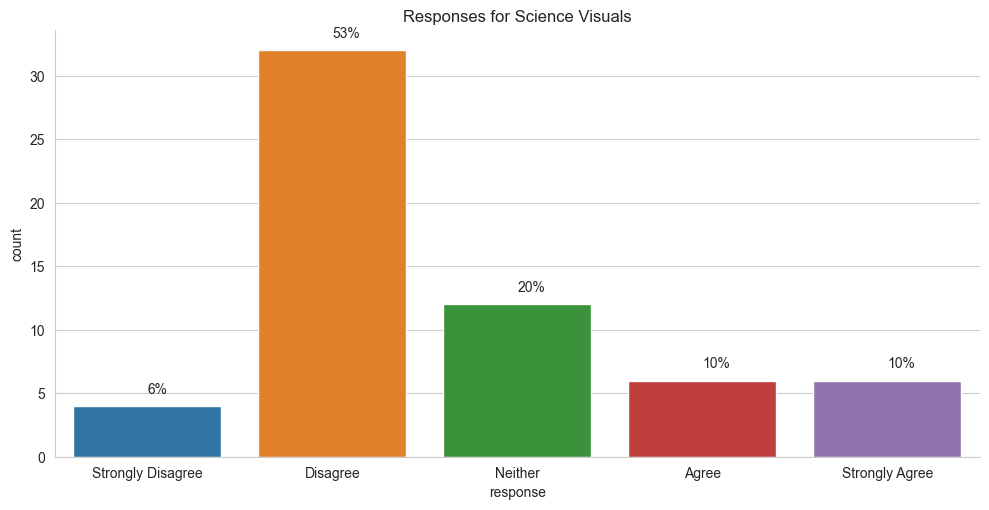

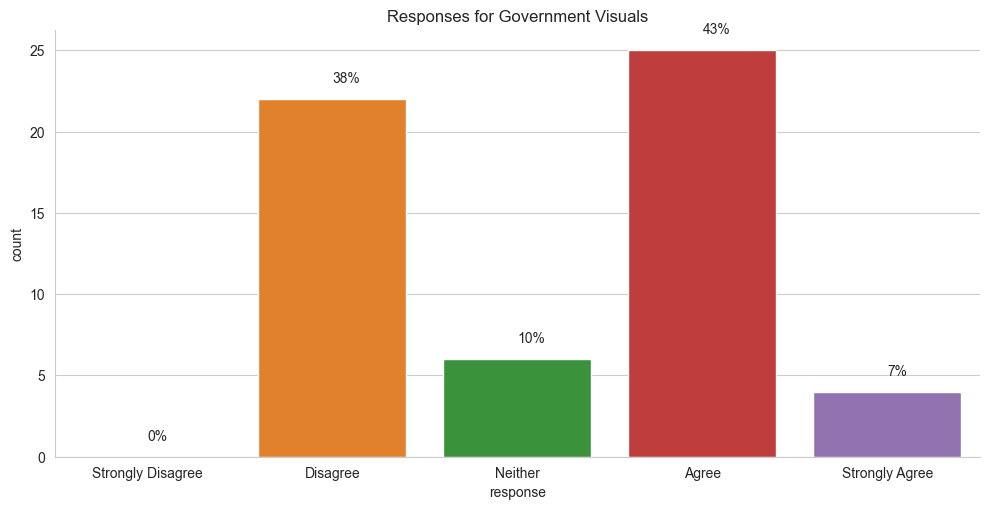

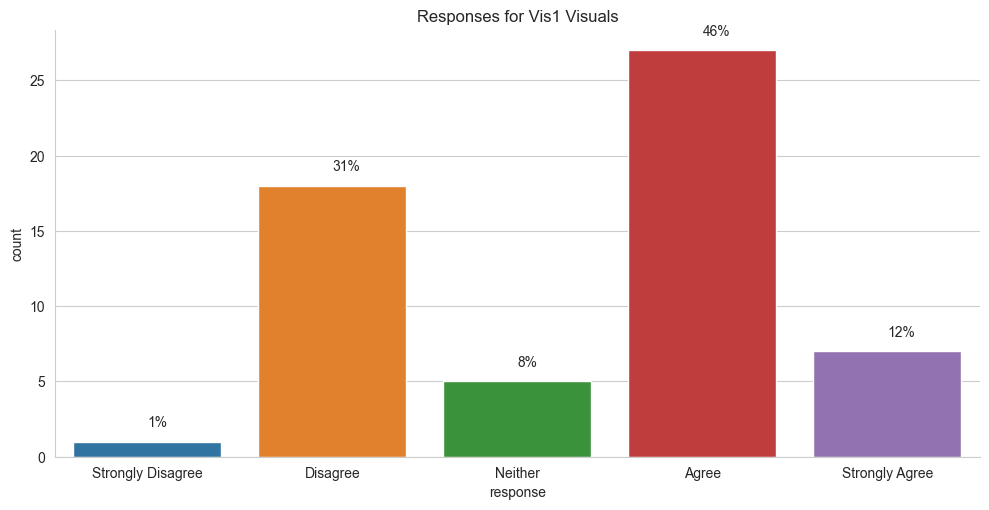

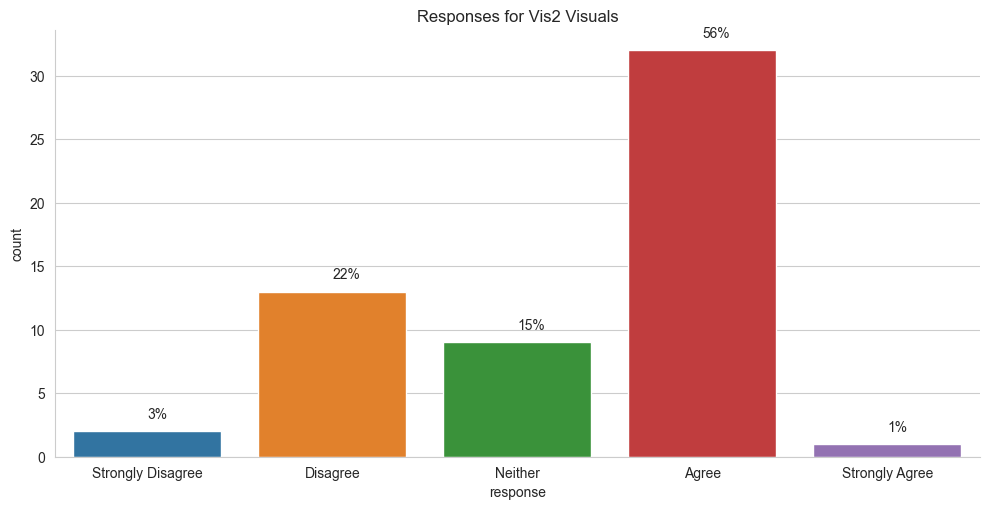

In [96]:
#Get
data_file = 'C8sniClhFKJUWpkdJtBdMQ.txt'
  
# reading the data from the file
with open(data_file) as f:
    data = f.read()
      
# reconstructing the data as a dictionary
js3 = json.loads(data)

cleanData = {}

for key,value in js3.items():
    if key not in cleanData.values():
        cleanData[key] = value
        
df3 = create_table(cleanData['responses'])

sns.set_style('whitegrid')

plot_response(df3, 'news')
plot_response(df3, 'vis3')
plot_response(df3, 'science')
plot_response(df3, 'government')
plot_response(df3, 'vis1')
plot_response(df3, 'vis2')

### Participant 4

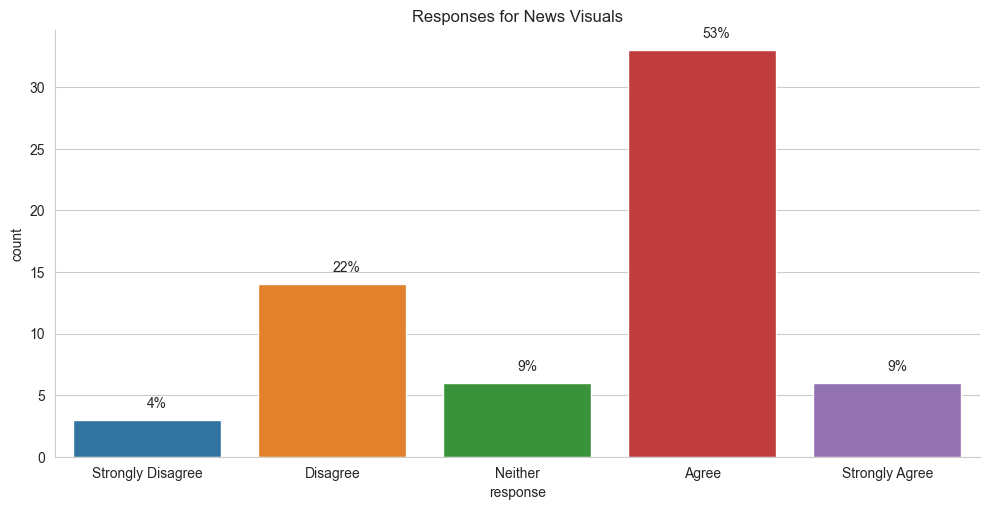

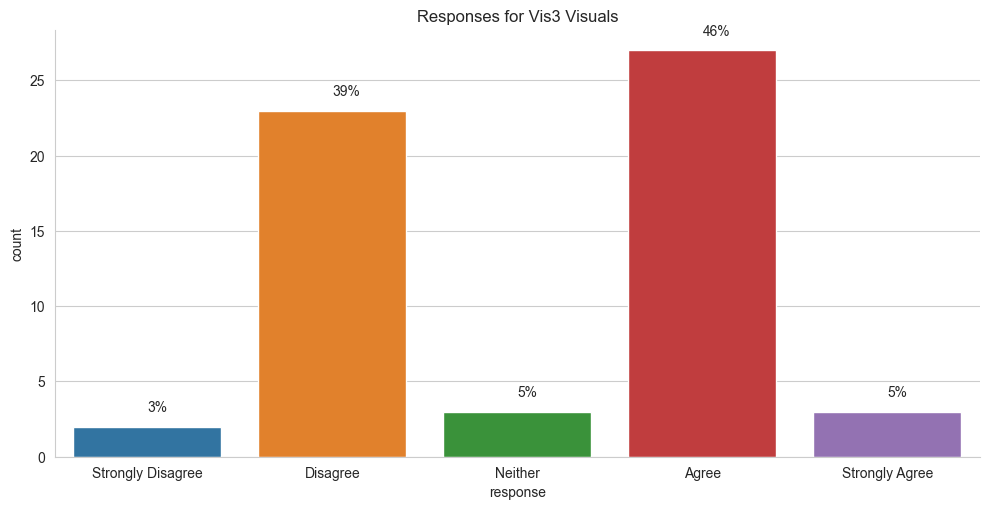

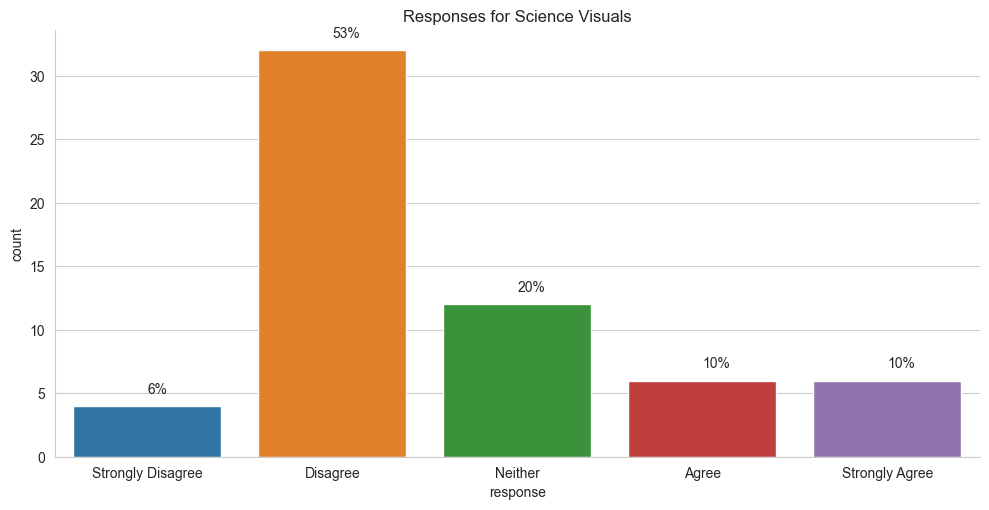

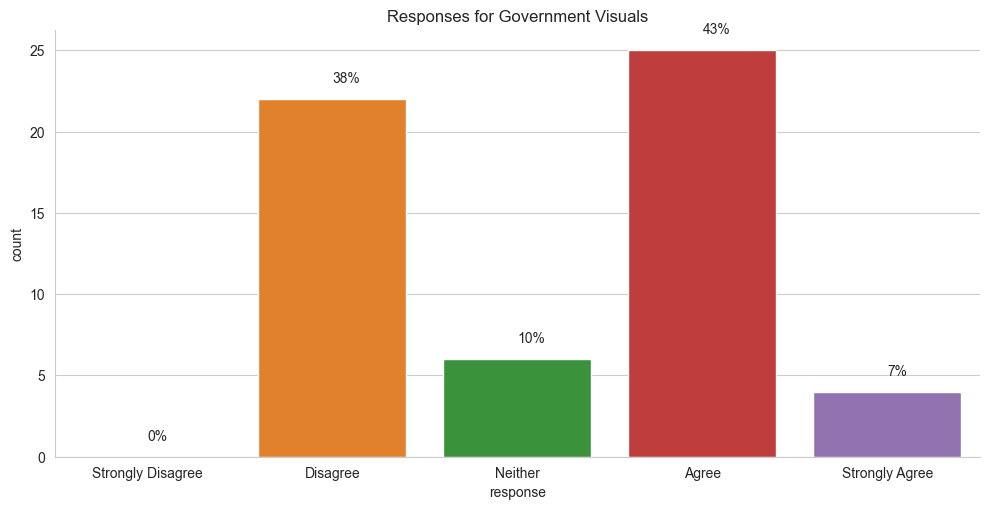

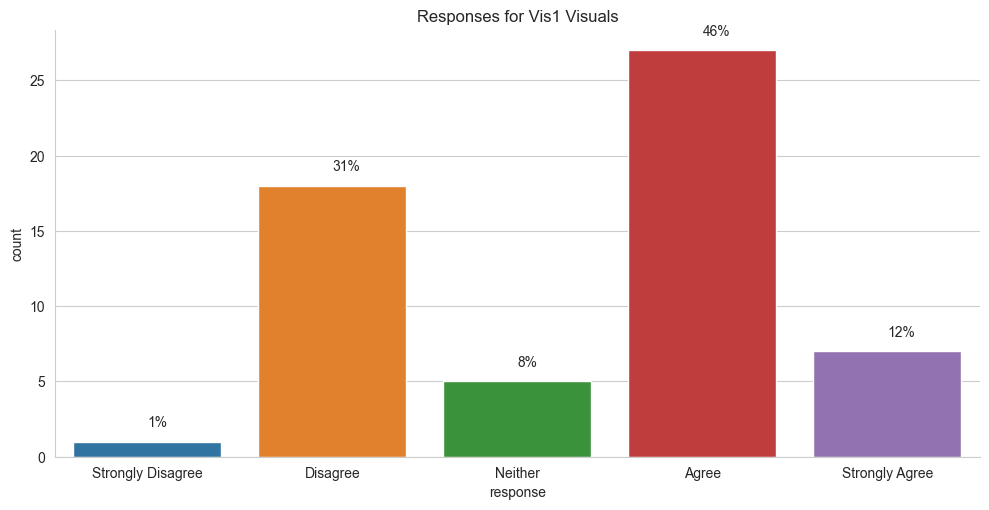

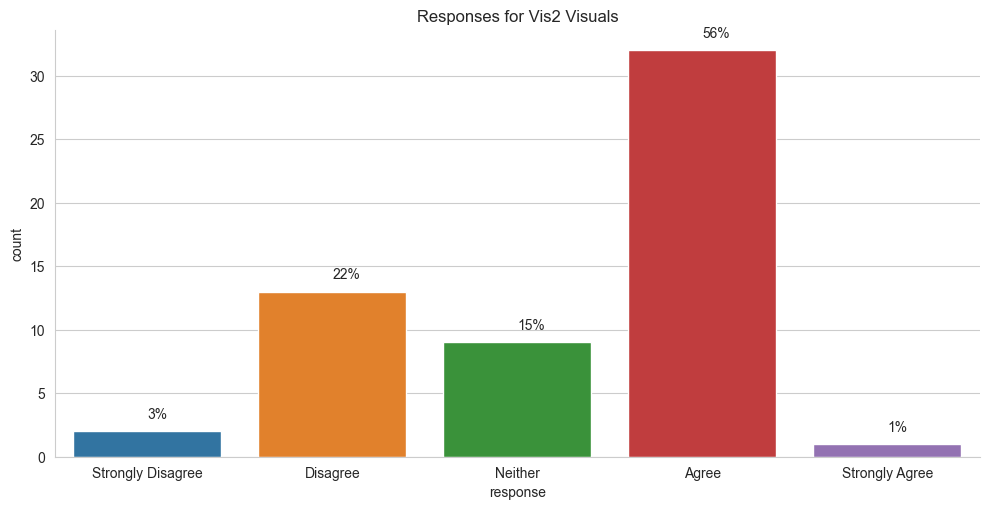

In [97]:
#Get
data_file = 'C8sniClhFKJUWpkdJtBdMQ.txt'
  
# reading the data from the file
with open(data_file) as f:
    data = f.read()
      
# reconstructing the data as a dictionary
js4 = json.loads(data)

cleanData = {}

for key,value in js4.items():
    if key not in cleanData.values():
        cleanData[key] = value
        
df4 = create_table(cleanData['responses'])

sns.set_style('whitegrid')

plot_response(df4, 'news')
plot_response(df4, 'vis3')
plot_response(df4, 'science')
plot_response(df4, 'government')
plot_response(df4, 'vis1')
plot_response(df4, 'vis2')

### Participant 5

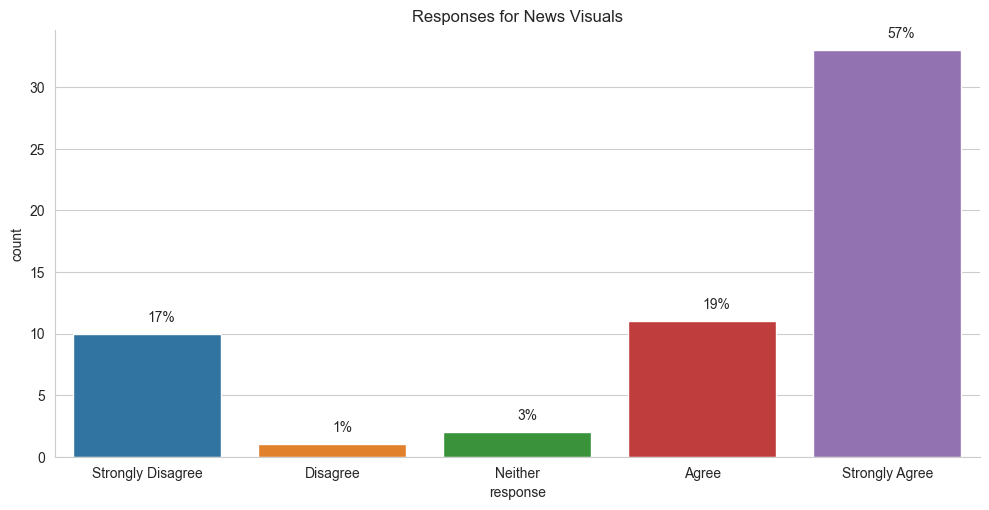

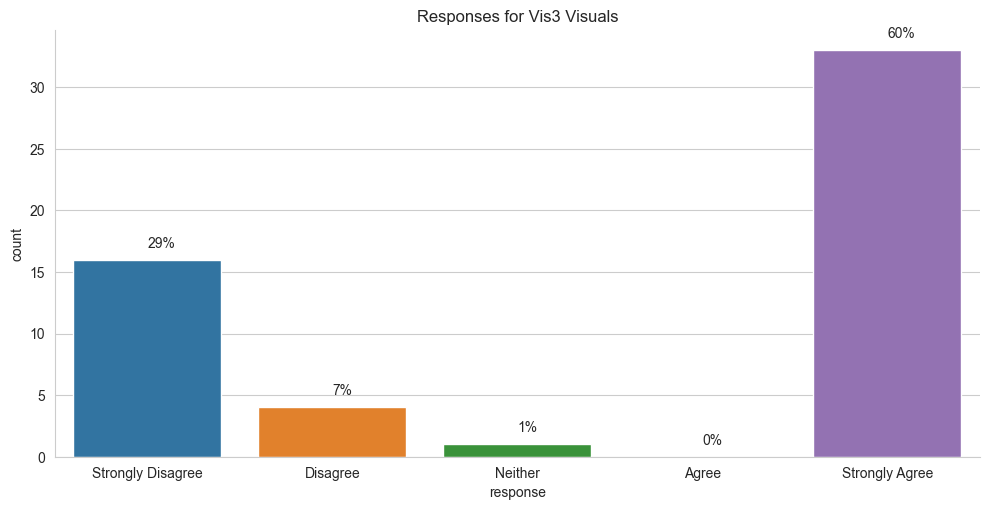

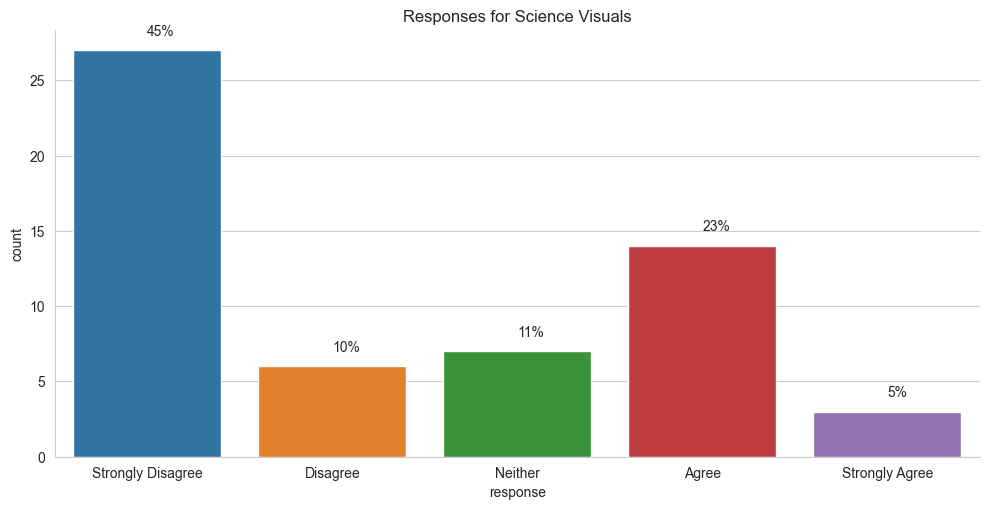

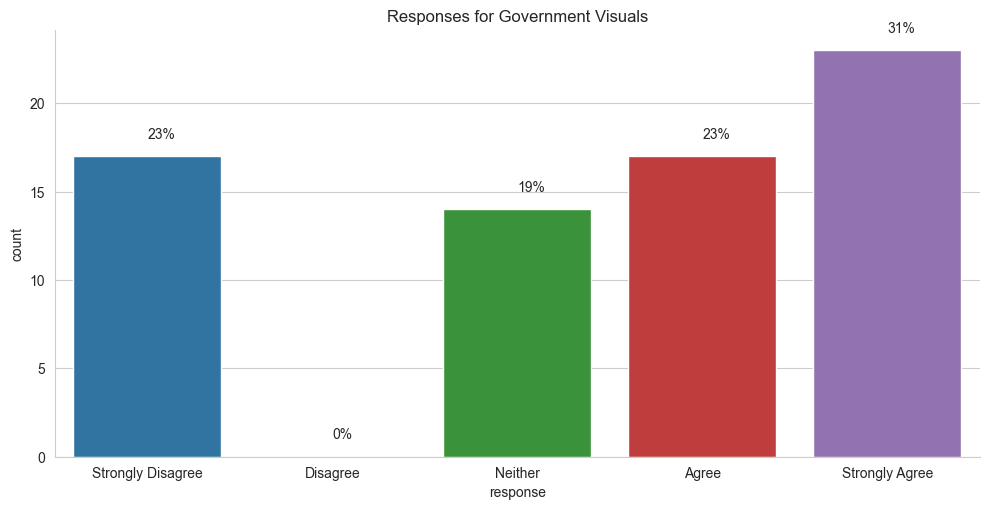

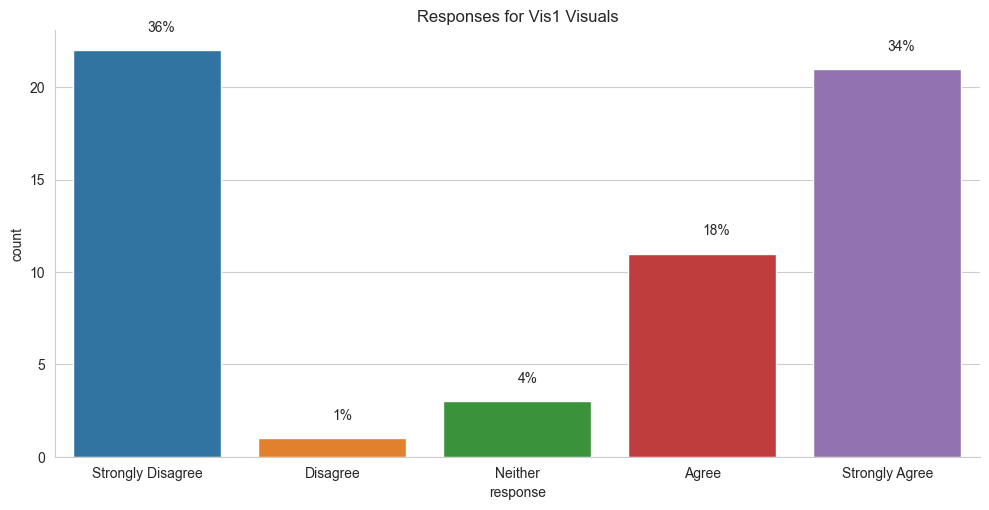

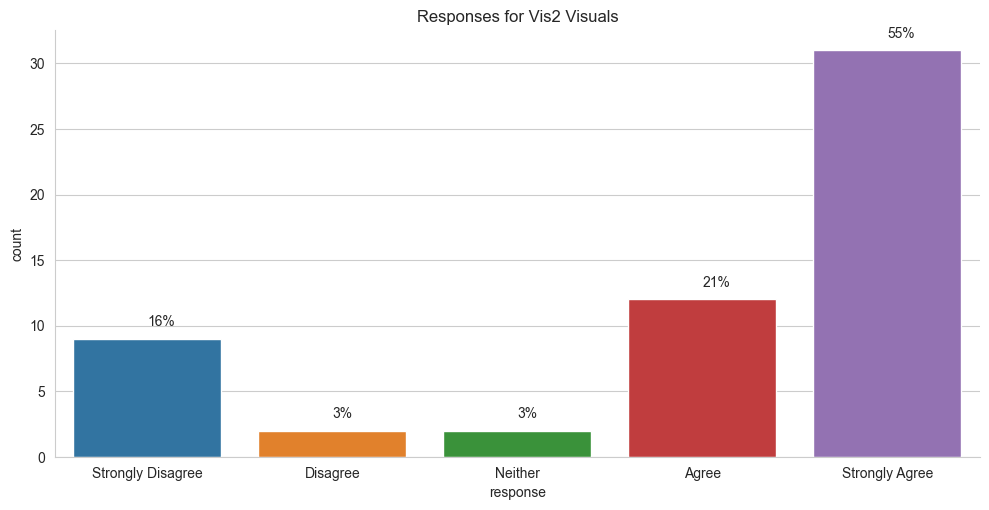

In [98]:
#Get
data_file = 'CAst6IJu1mbQh4VGPrs7Mw.txt'
  
# reading the data from the file
with open(data_file) as f:
    data = f.read()
      
# reconstructing the data as a dictionary
js5 = json.loads(data)

cleanData = {}

for key,value in js5.items():
    if key not in cleanData.values():
        cleanData[key] = value
        
df5 = create_table(cleanData['responses'])

sns.set_style('whitegrid')

plot_response(df5, 'news')
plot_response(df5, 'vis3')
plot_response(df5, 'science')
plot_response(df5, 'government')
plot_response(df5, 'vis1')
plot_response(df5, 'vis2')

### Participant 6

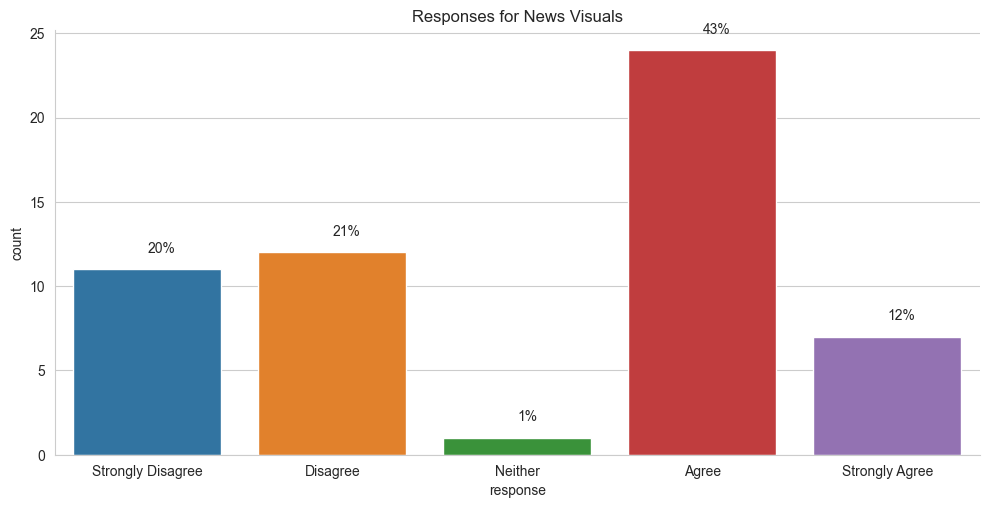

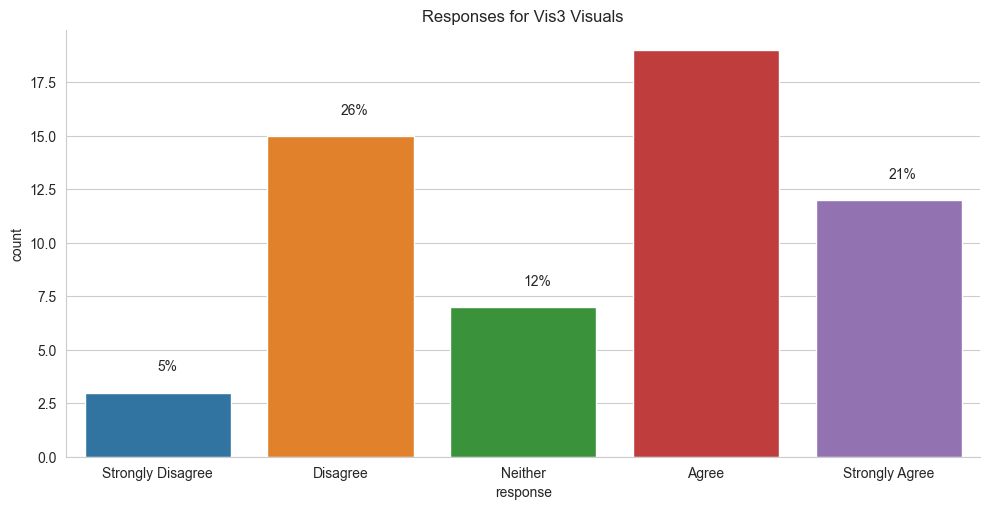

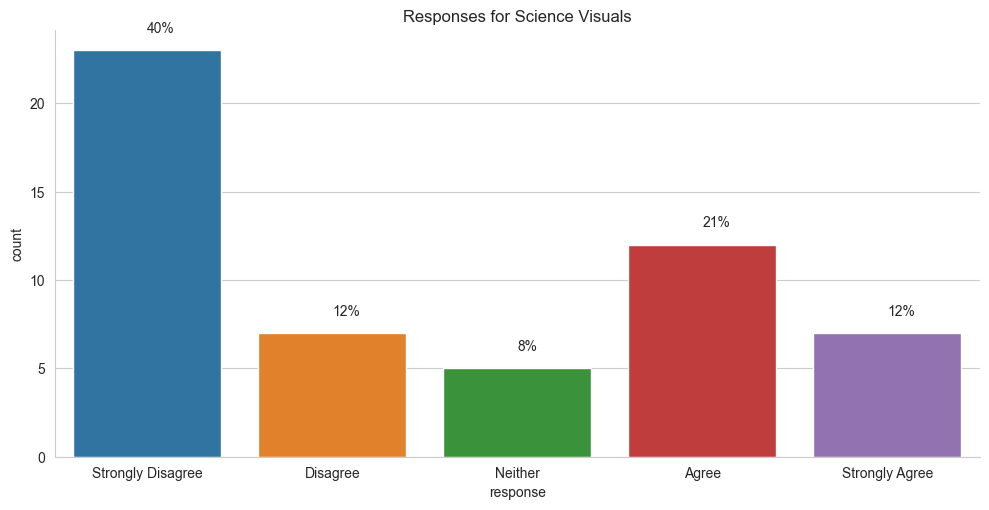

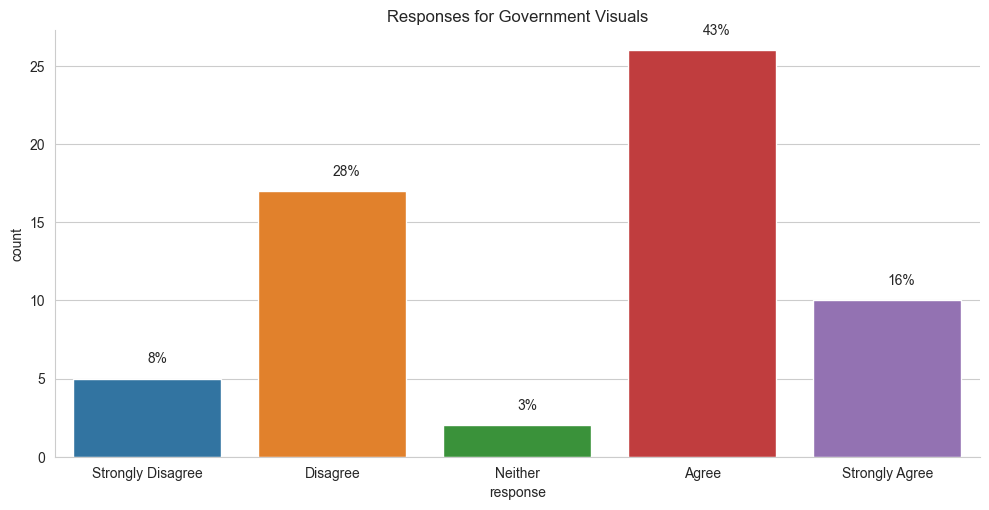

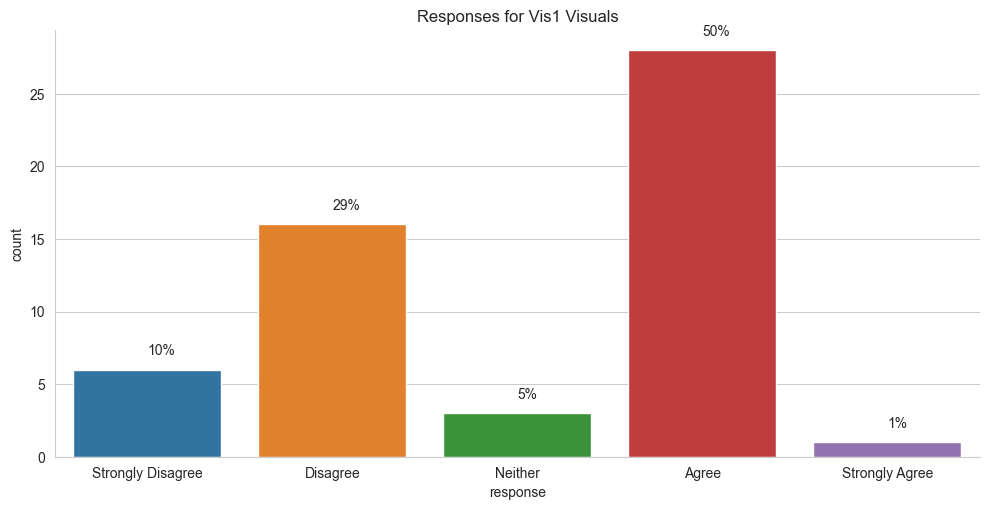

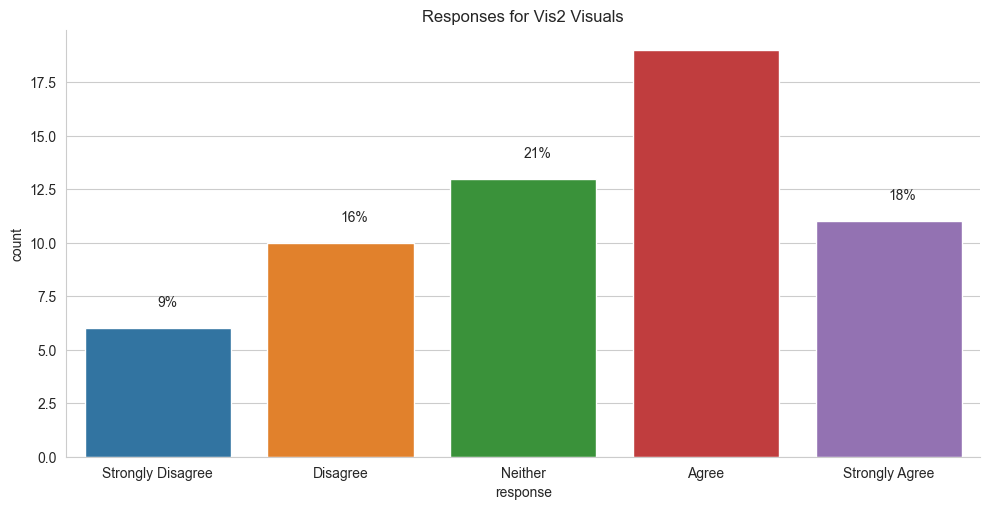

In [99]:
#Get
data_file = 'dYhVzMT6hTBJ8SCSDLgvBQ.txt'
  
# reading the data from the file
with open(data_file) as f:
    data = f.read()
      
# reconstructing the data as a dictionary
js6 = json.loads(data)

cleanData = {}

for key,value in js6.items():
    if key not in cleanData.values():
        cleanData[key] = value
        
df6 = create_table(cleanData['responses'])

sns.set_style('whitegrid')

plot_response(df6, 'news')
plot_response(df6, 'vis3')
plot_response(df6, 'science')
plot_response(df6, 'government')
plot_response(df6, 'vis1')
plot_response(df6, 'vis2')

### Participant 7

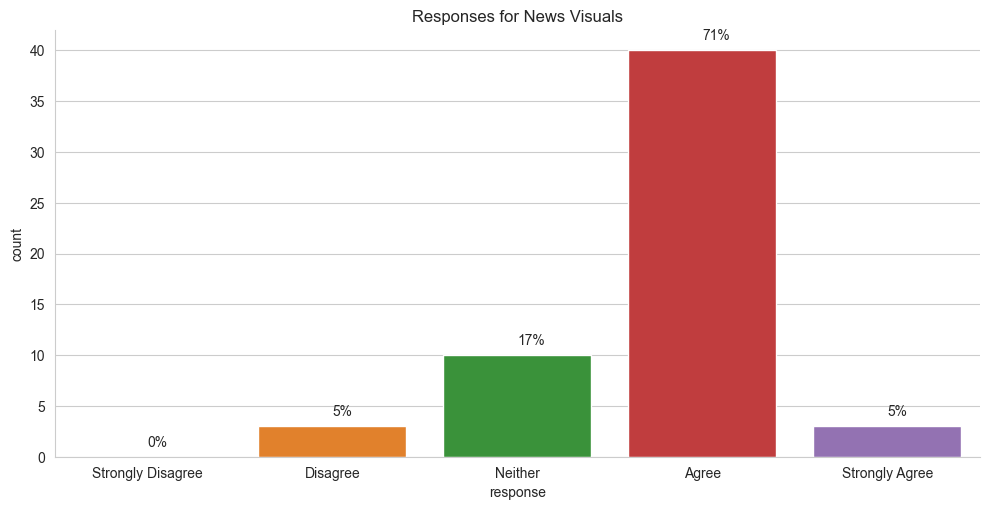

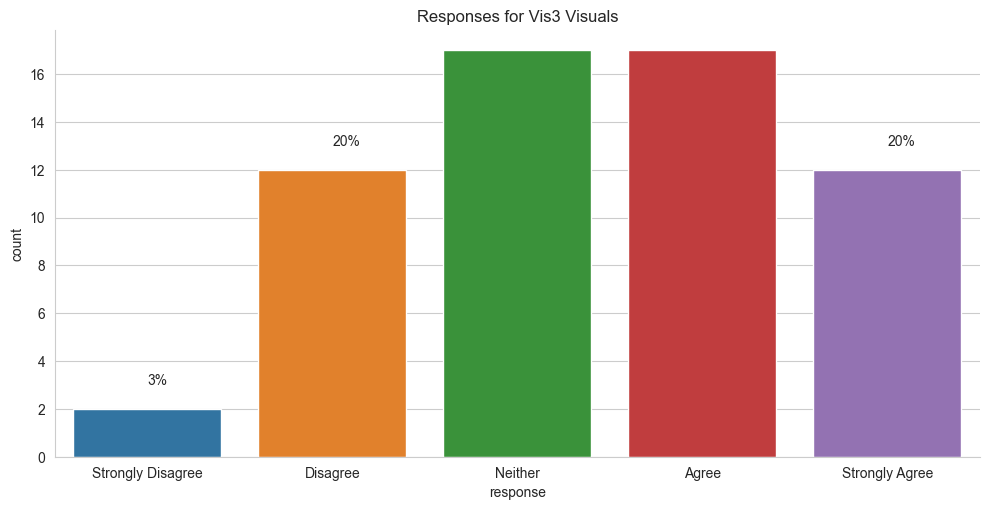

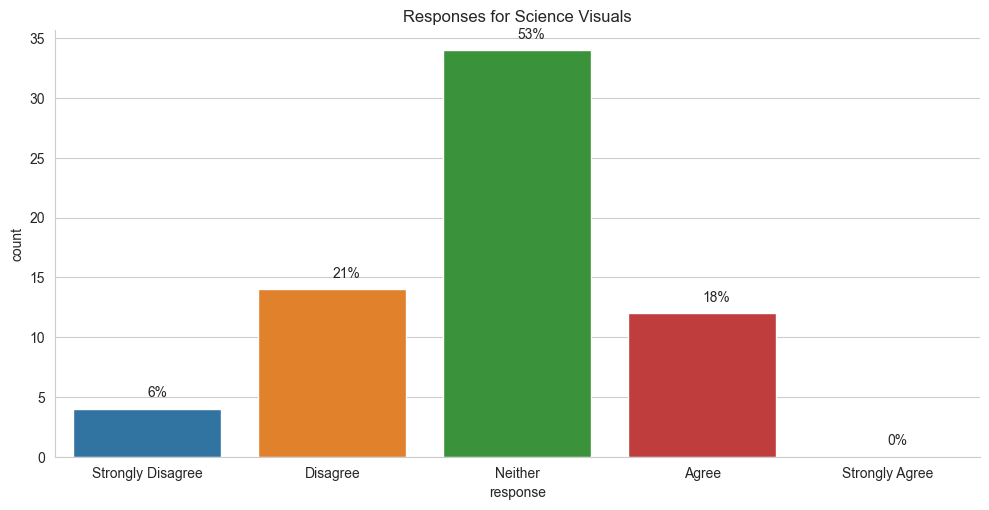

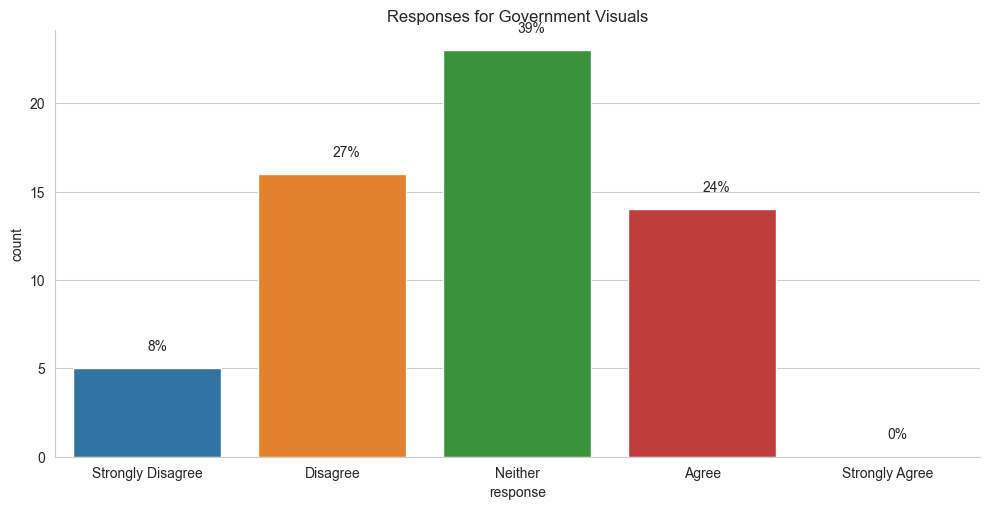

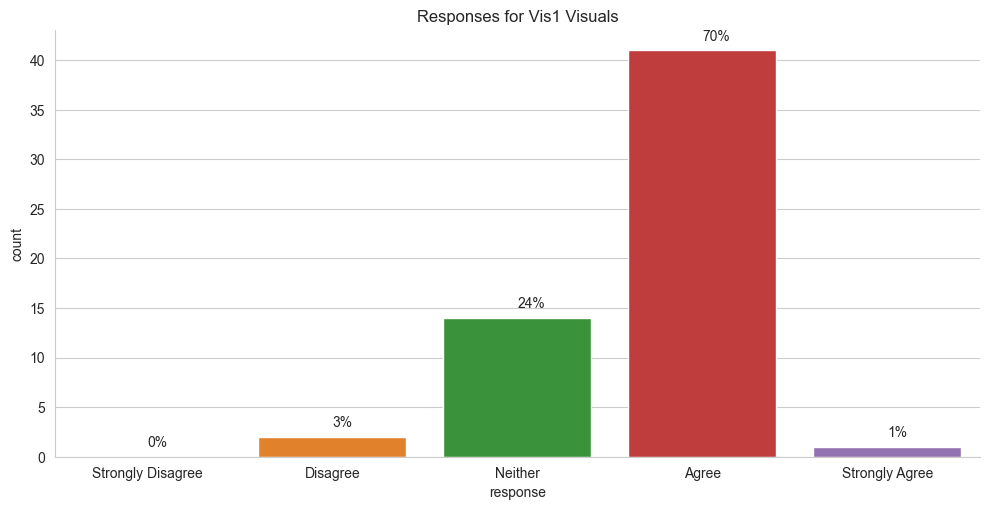

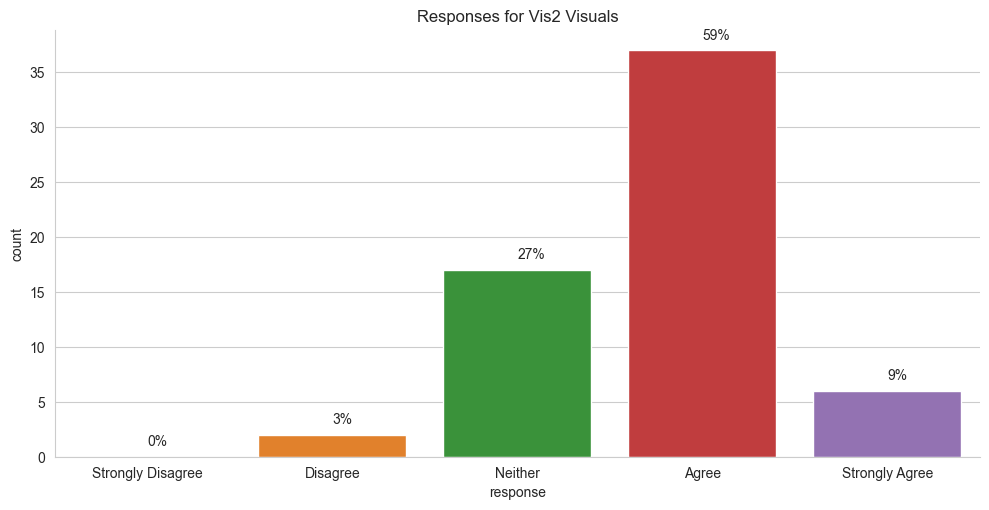

In [100]:
#Get
data_file = 'FpVPTjgHaUWA_eIrRNWjdw.txt'
  
# reading the data from the file
with open(data_file) as f:
    data = f.read()
      
# reconstructing the data as a dictionary
js7 = json.loads(data)

cleanData = {}

for key,value in js7.items():
    if key not in cleanData.values():
        cleanData[key] = value
        
df7 = create_table(cleanData['responses'])

sns.set_style('whitegrid')

plot_response(df7, 'news')
plot_response(df7, 'vis3')
plot_response(df7, 'science')
plot_response(df7, 'government')
plot_response(df7, 'vis1')
plot_response(df7, 'vis2')

### Participant 8

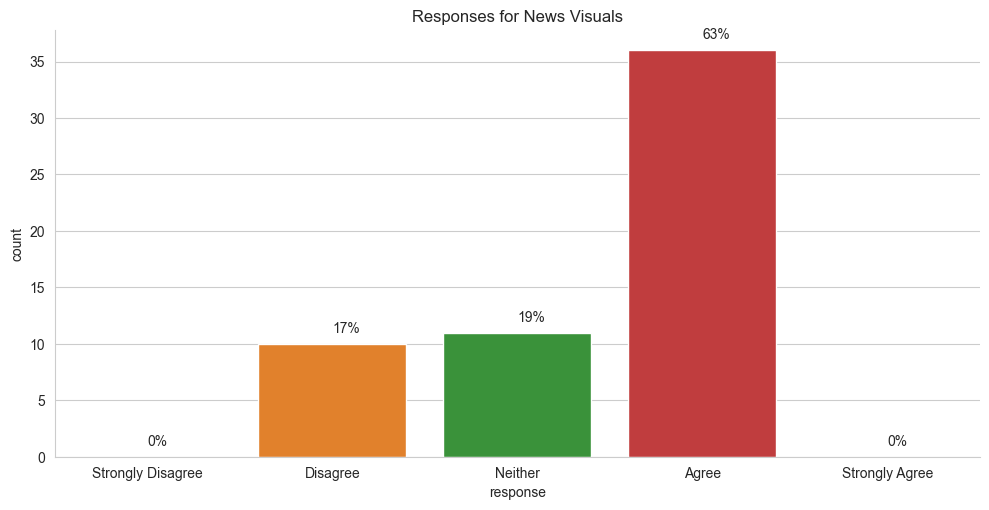

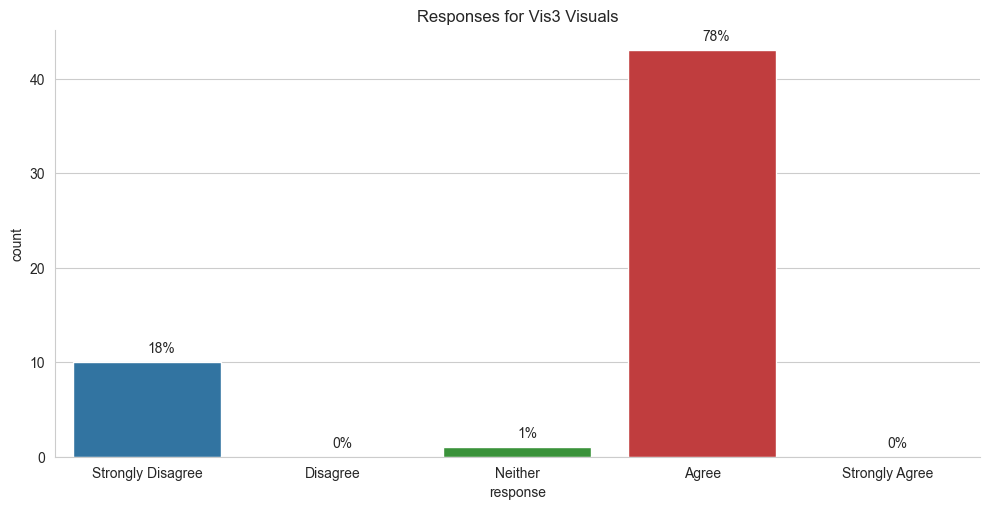

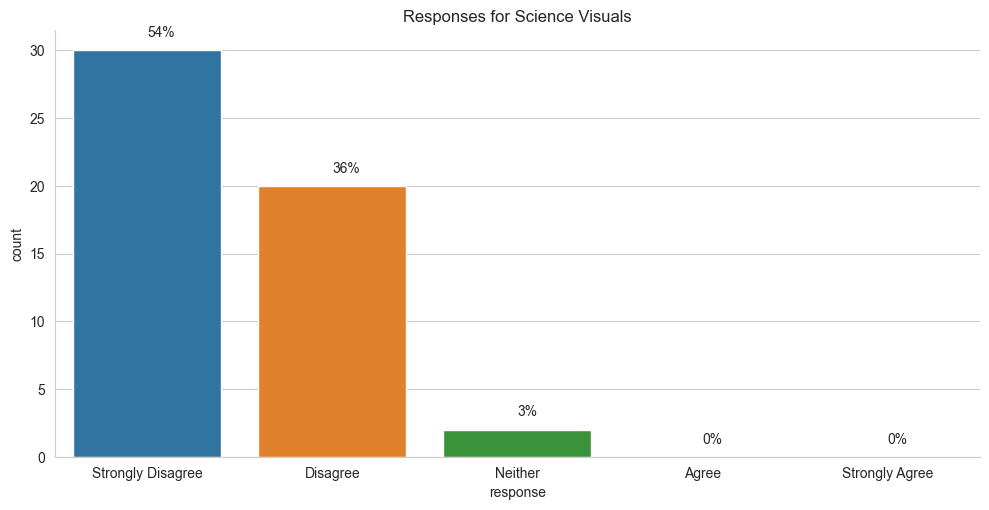

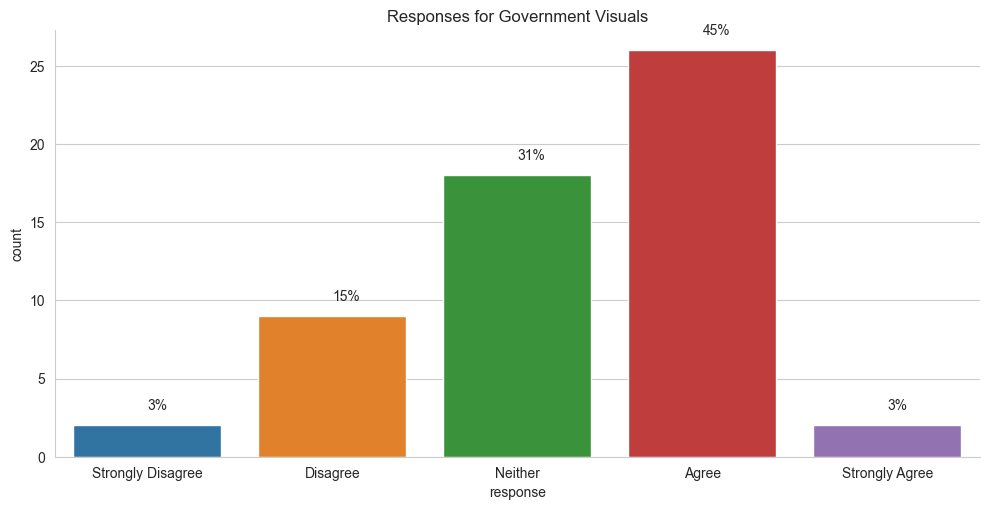

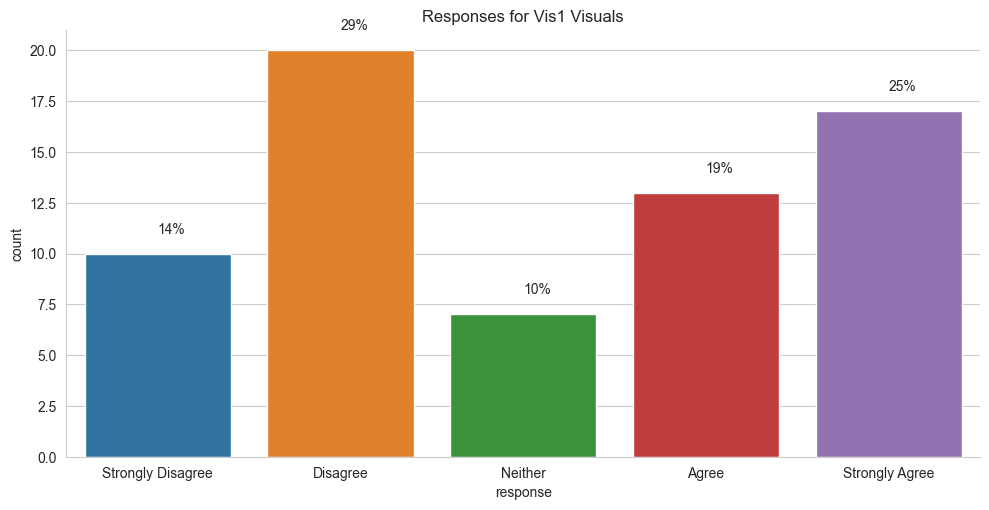

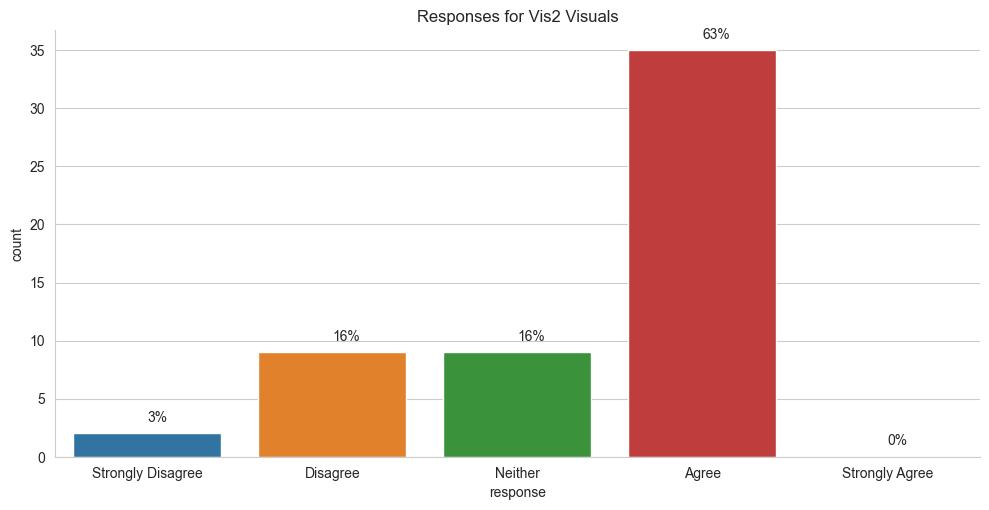

In [101]:
#Get
data_file = 'Sv_ZdnSoWDwmYWACFgeTcA.txt'
  
# reading the data from the file
with open(data_file) as f:
    data = f.read()
      
# reconstructing the data as a dictionary
js8 = json.loads(data)

cleanData = {}

for key,value in js8.items():
    if key not in cleanData.values():
        cleanData[key] = value
        
df8 = create_table(cleanData['responses'])

sns.set_style('whitegrid')

plot_response(df8, 'news')
plot_response(df8, 'vis3')
plot_response(df8, 'science')
plot_response(df8, 'government')
plot_response(df8, 'vis1')
plot_response(df8, 'vis2')

### Participant 9

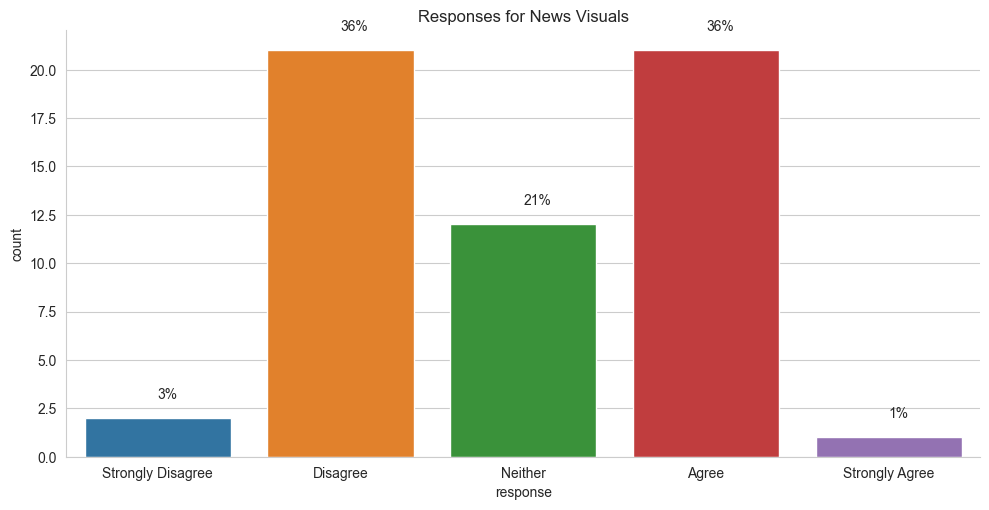

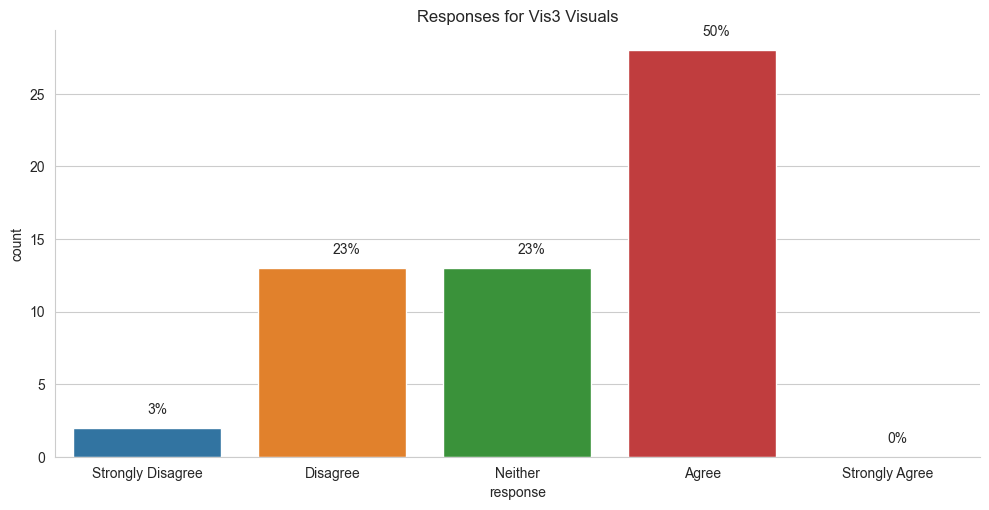

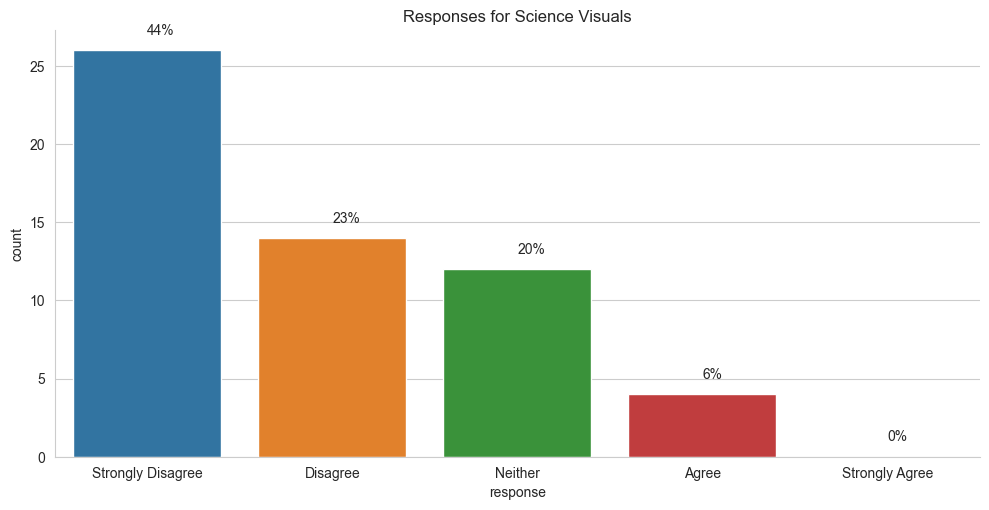

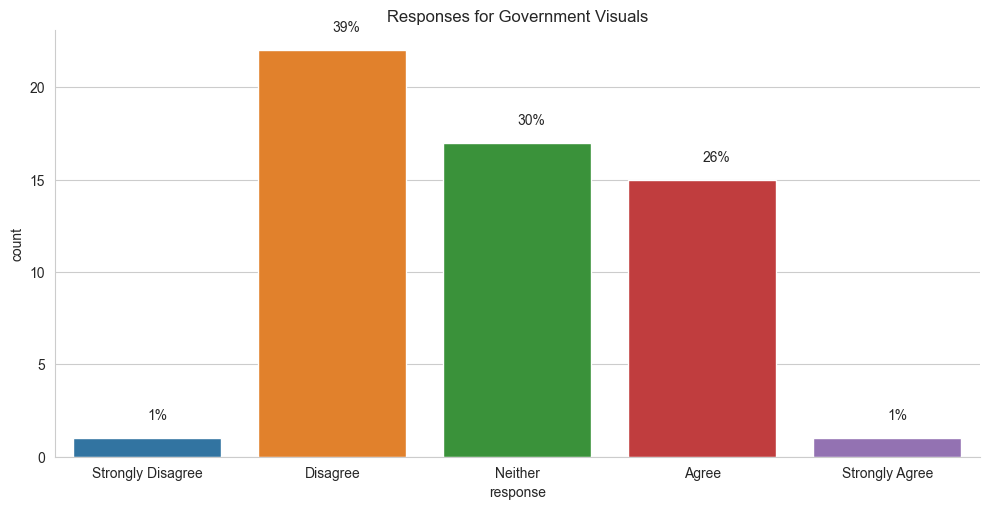

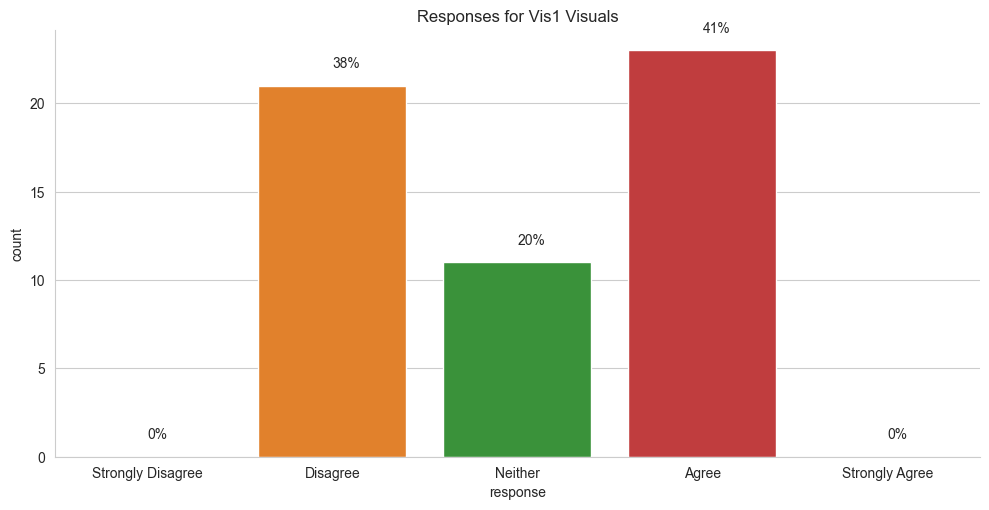

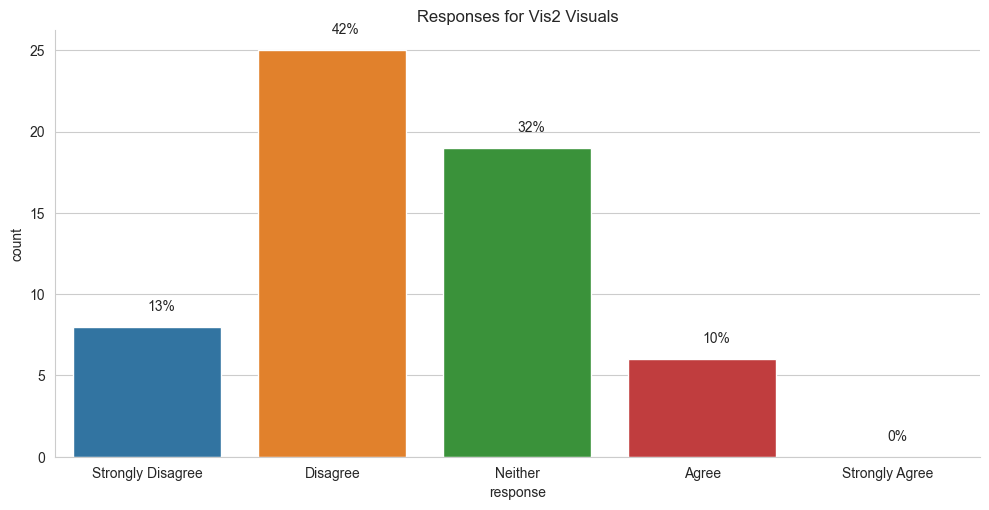

In [102]:
#Get
data_file = 'yVsZ2V9CJoo2z3VgB3jF0w.txt'
  
# reading the data from the file
with open(data_file) as f:
    data = f.read()
      
# reconstructing the data as a dictionary
js9 = json.loads(data)

cleanData = {}

for key,value in js9.items():
    if key not in cleanData.values():
        cleanData[key] = value
        
df9 = create_table(cleanData['responses'])

sns.set_style('whitegrid')

plot_response(df9, 'news')
plot_response(df9, 'vis3')
plot_response(df9, 'science')
plot_response(df9, 'government')
plot_response(df9, 'vis1')
plot_response(df9, 'vis2')

### Participant 10

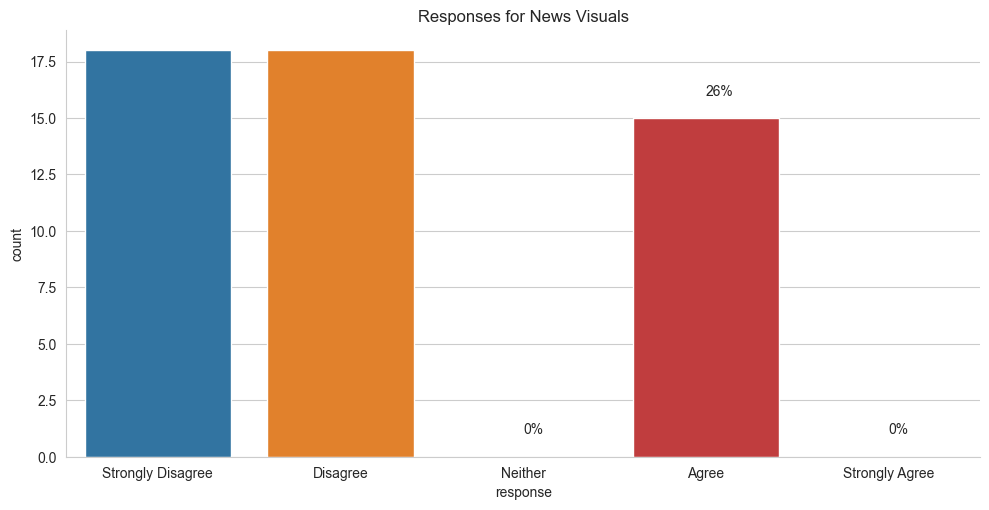

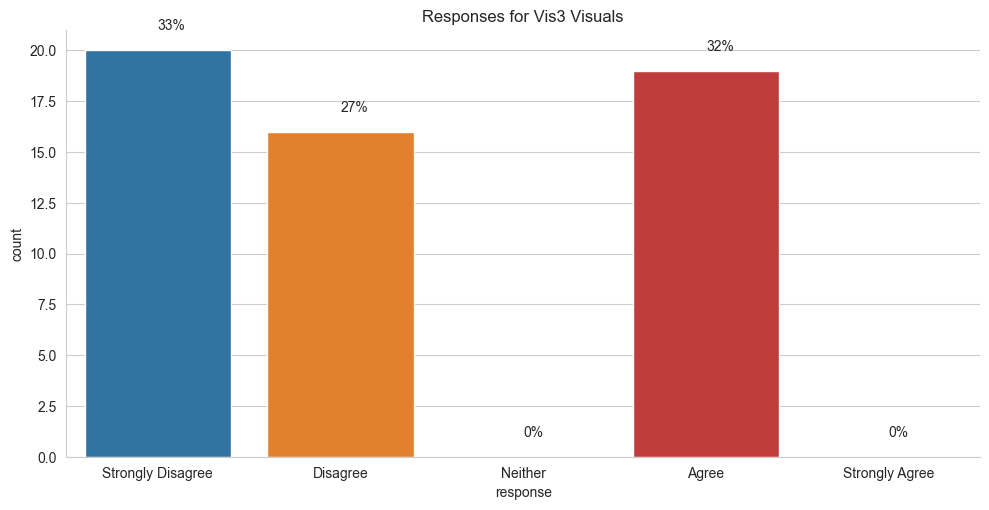

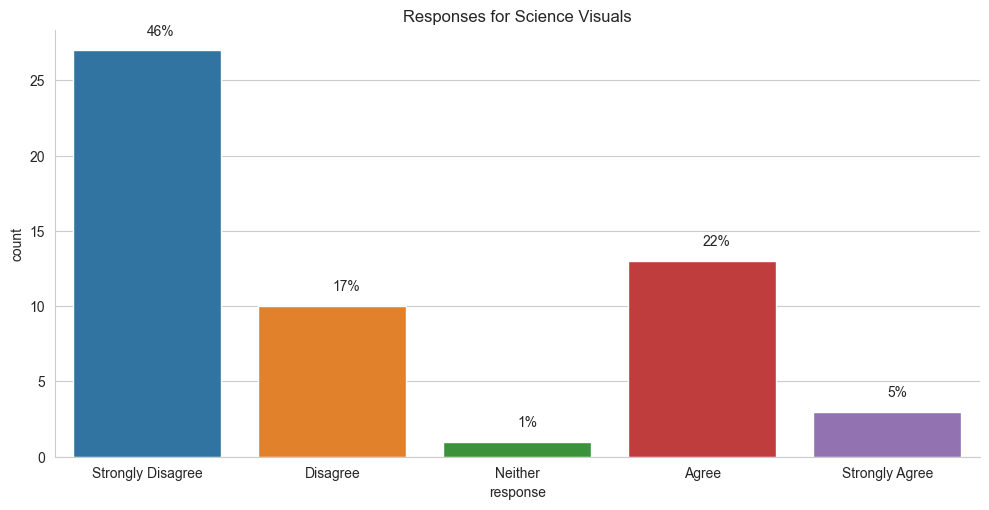

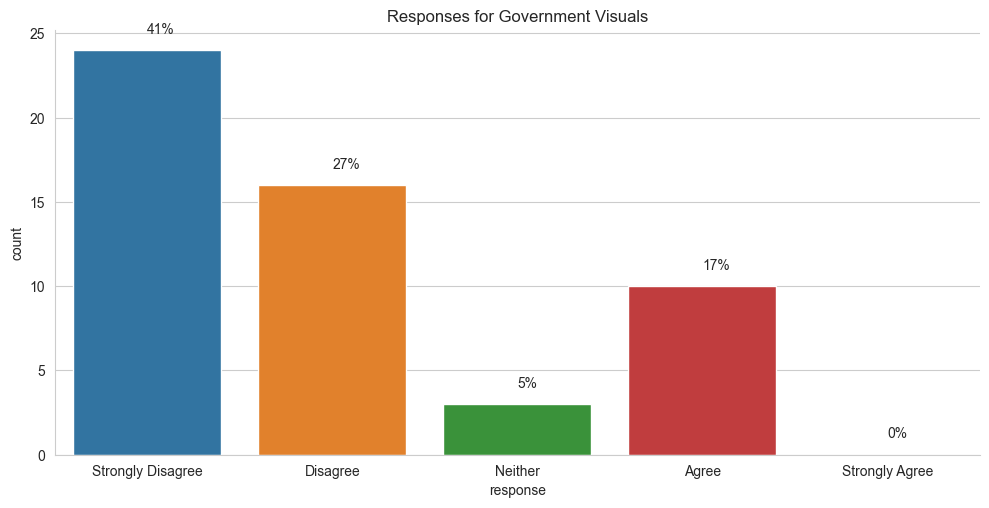

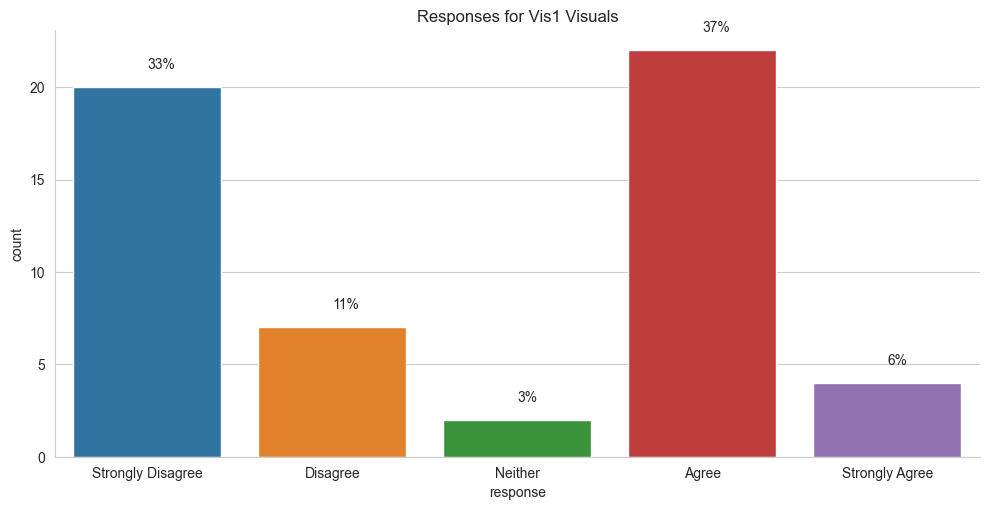

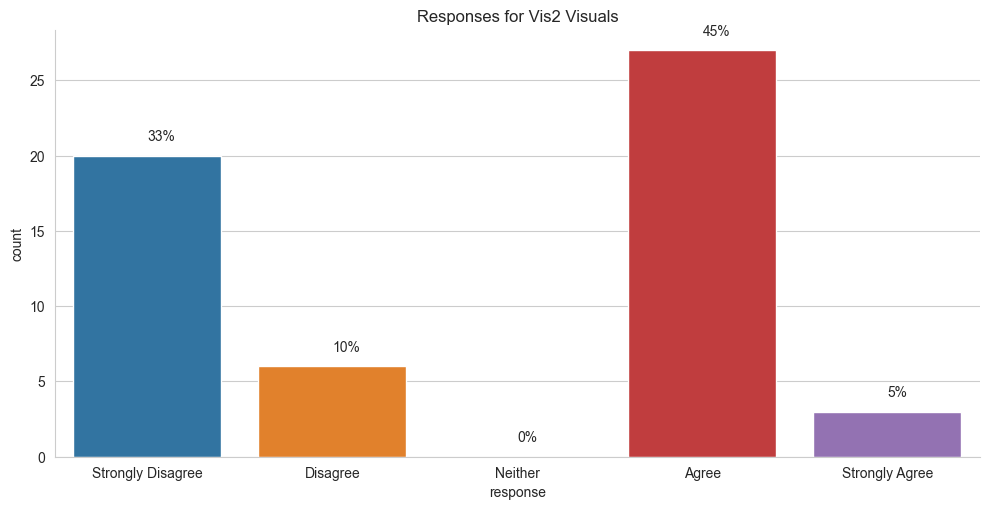

In [112]:
#Get
data_file = 'pPbJRJFp2YcuE504Awc29A.txt'
  
# reading the data from the file
with open(data_file) as f:
    data = f.read()
      
# reconstructing the data as a dictionary
js10 = json.loads(data)

cleanData = {}

for key,value in js10.items():
    if key not in cleanData.values():
        cleanData[key] = value
        
df10 = create_table(cleanData['responses'])

sns.set_style('whitegrid')

plot_response(df10, 'news')
plot_response(df10, 'vis3')
plot_response(df10, 'science')
plot_response(df10, 'government')
plot_response(df10, 'vis1')
plot_response(df10, 'vis2')

## All Participants

In [113]:
#1
data_file1 = 'UuBoG0_KiytpUZXX9V7Enw.txt'
  
# reading the data from the file
with open(data_file1) as f:
    data1 = f.read()
      
# reconstructing the data as a dictionary
js1 = json.loads(data1)

cleanData1 = {}

for key,value in js1.items():
    if key not in cleanData1.values():
        cleanData1[key] = value
df1 = create_table(cleanData1['responses'])

#Get
data_file2 = 'mXQxt45qf3HmNZ8V6Y-gQg.txt'
  
# reading the data from the file
with open(data_file2) as f:
    data2 = f.read()
      
# reconstructing the data as a dictionary
js2 = json.loads(data2)

cleanData2 = {}

for key,value in js2.items():
    if key not in cleanData2.values():
        cleanData2[key] = value
df2 = create_table(cleanData2['responses'])

#3
data_file3 = 'C8sniClhFKJUWpkdJtBdMQ.txt'
  
# reading the data from the file
with open(data_file3) as f:
    data3 = f.read()
      
# reconstructing the data as a dictionary
js3 = json.loads(data3)

cleanData3 = {}

for key,value in js3.items():
    if key not in cleanData3.values():
        cleanData3[key] = value
df3 = create_table(cleanData3['responses'])

#4
data_file4 = 'C8sniClhFKJUWpkdJtBdMQ.txt'
  
# reading the data from the file
with open(data_file4) as f:
    data4 = f.read()
      
# reconstructing the data as a dictionary
js4 = json.loads(data4)

cleanData4 = {}

for key,value in js4.items():
    if key not in cleanData4.values():
        cleanData4[key] = value
df4 = create_table(cleanData4['responses'])

#5
data_file5 = 'CAst6IJu1mbQh4VGPrs7Mw.txt'
  
# reading the data from the file
with open(data_file5) as f:
    data5 = f.read()
      
# reconstructing the data as a dictionary
js5 = json.loads(data5)

cleanData5 = {}

for key,value in js5.items():
    if key not in cleanData5.values():
        cleanData5[key] = value
df5 = create_table(cleanData5['responses'])

#6
data_file6 = 'dYhVzMT6hTBJ8SCSDLgvBQ.txt'
  
# reading the data from the file
with open(data_file6) as f:
    data6 = f.read()
      
# reconstructing the data as a dictionary
js6 = json.loads(data6)

cleanData6 = {}

for key,value in js6.items():
    if key not in cleanData6.values():
        cleanData6[key] = value
df6 = create_table(cleanData6['responses'])

#7
data_file7 = 'FpVPTjgHaUWA_eIrRNWjdw.txt'
  
# reading the data from the file
with open(data_file7) as f:
    data7 = f.read()
      
# reconstructing the data as a dictionary
js7 = json.loads(data7)

cleanData7 = {}

for key,value in js7.items():
    if key not in cleanData7.values():
        cleanData7[key] = value
df7 = create_table(cleanData7['responses'])

#8
data_file8 = 'Sv_ZdnSoWDwmYWACFgeTcA.txt'
  
# reading the data from the file
with open(data_file8) as f:
    data8 = f.read()
      
# reconstructing the data as a dictionary
js8 = json.loads(data8)

cleanData8 = {}

for key,value in js8.items():
    if key not in cleanData8.values():
        cleanData8[key] = value
df8 = create_table(cleanData8['responses'])

#9
data_file9 = 'yVsZ2V9CJoo2z3VgB3jF0w.txt'
  
# reading the data from the file
with open(data_file9) as f:
    data9 = f.read()
      
# reconstructing the data as a dictionary
js9 = json.loads(data9)

cleanData9 = {}

for key,value in js9.items():
    if key not in cleanData9.values():
        cleanData9[key] = value
        
df9 = create_table(cleanData9['responses'])

#10
data_file10 = 'pPbJRJFp2YcuE504Awc29A.txt'
  
# reading the data from the file
with open(data_file10) as f:
    data10 = f.read()
      
# reconstructing the data as a dictionary
js10 = json.loads(data10)

cleanData10 = {}

for key,value in js10.items():
    if key not in cleanData10.values():
        cleanData10[key] = value
df10 = create_table(cleanData10['responses'])

#ALL
concatenated = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10])

In [114]:
concatenated

,name,id,response,image,folder
0,likert_1,1,Strongly Agree,vis2/vis334.png,vis2
1,likert_2,8,Neither,vis2/vis334.png,vis2
2,likert_3,11,Strongly Agree,vis2/vis334.png,vis2
3,likert_4,16,Strongly Agree,vis2/vis334.png,vis2
4,likert_5,22,Agree,vis2/vis334.png,vis2
...,...,...,...,...,...
9,likert_7,32,Agree,government/whoJ45_1.png,government
10,likert_8,40,Strongly Disagree,government/whoJ45_1.png,government
11,45,Strongly Disagree,NaN,government/whoJ45_1.png,government
12,likert_10,50,Strongly Disagree,government/whoJ45_1.png,government


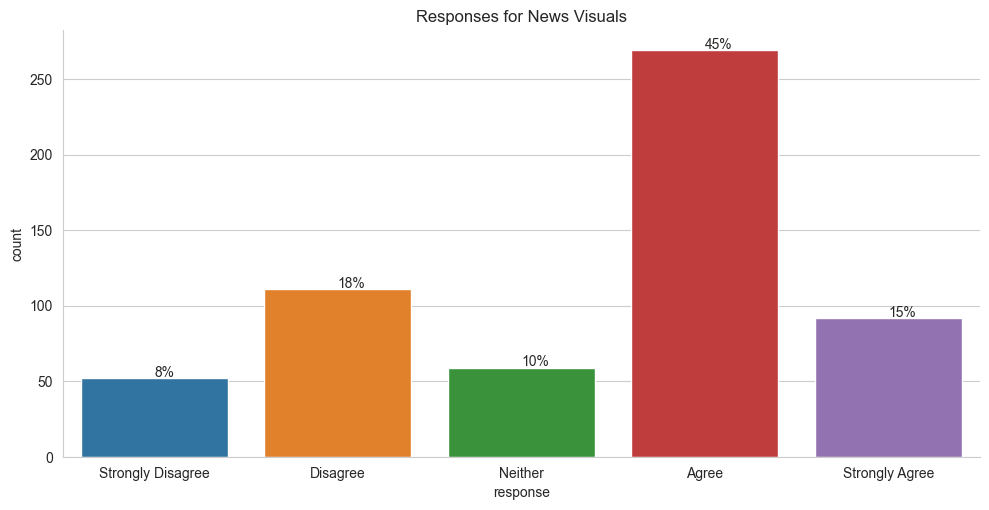

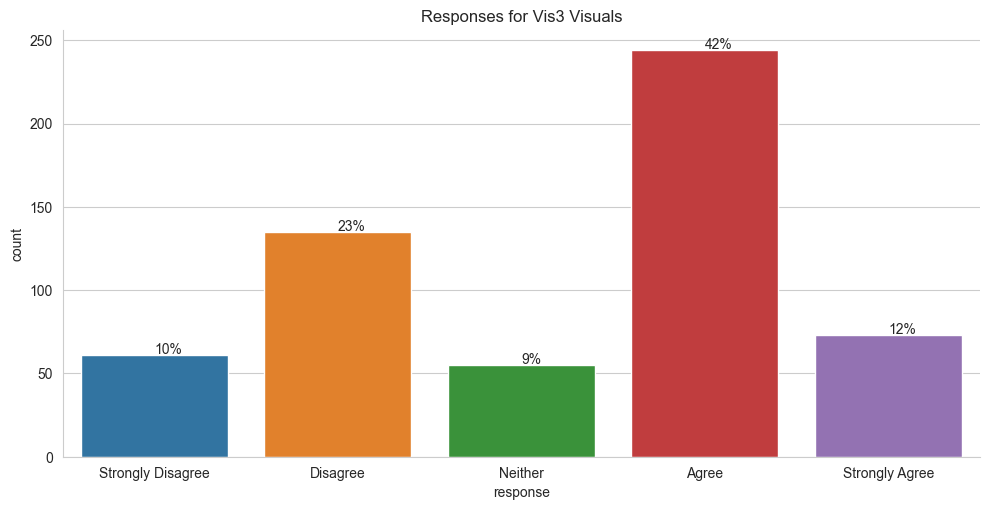

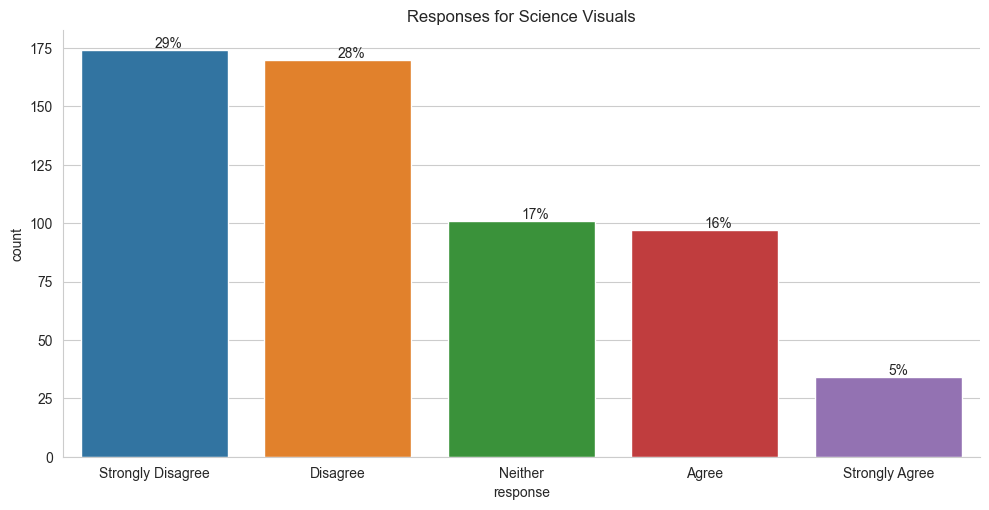

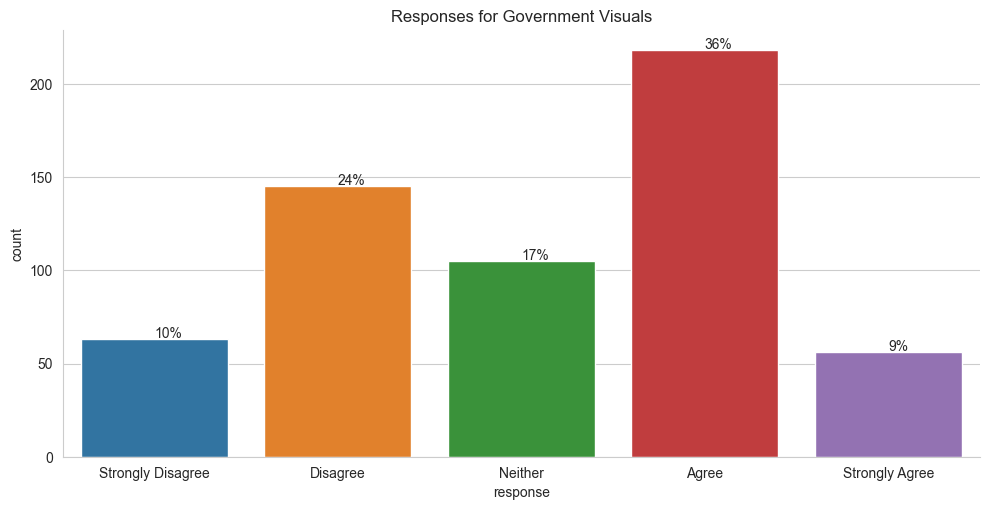

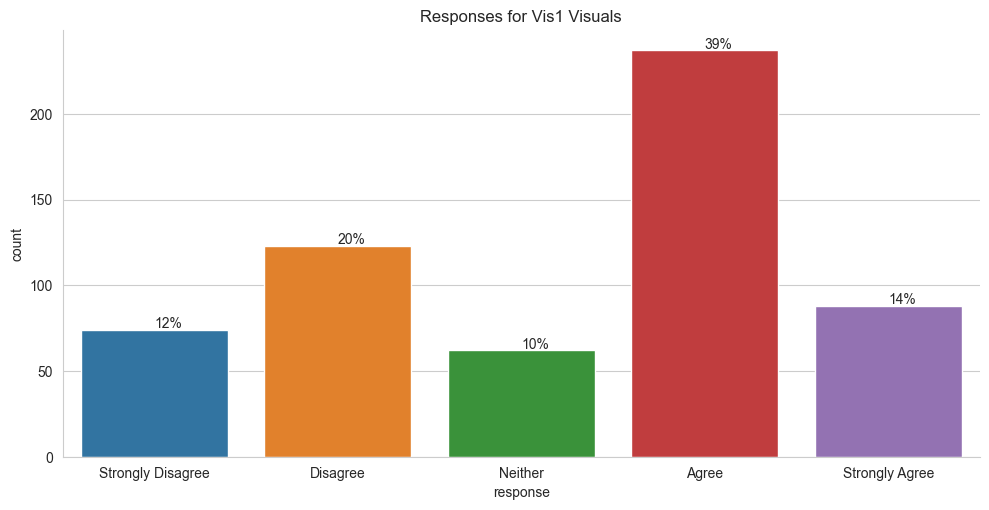

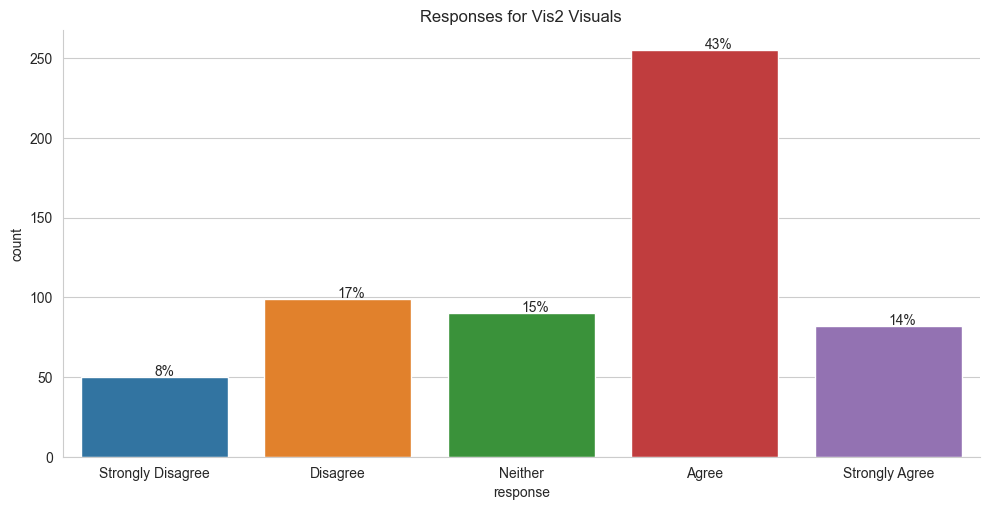

In [115]:
sns.set_style('whitegrid')

plot_response(concatenated, 'news')
plot_response(concatenated, 'vis3')
plot_response(concatenated, 'science')
plot_response(concatenated, 'government')
plot_response(concatenated, 'vis1')
plot_response(concatenated, 'vis2')